# Importing Necessary Modules

In [137]:
#import sys
#!{sys.executable} -m pip install pandas numpy matplotlib seaborn datetime scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report,roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Data Reading

In [5]:
player_career_df = pd.read_csv('https://raw.githubusercontent.com/richard2323233/schulich_data_science/main/player_career_info.csv')
player_game_df = pd.read_csv('https://raw.githubusercontent.com/richard2323233/schulich_data_science/main/player_per_game.csv')
player_shooting_df = pd.read_csv('https://raw.githubusercontent.com/richard2323233/schulich_data_science/main/player_shooting.csv')


In [6]:
player_career_df.head(10)

,player_id,player,birth_year,hof,num_seasons,first_seas,last_seas
0,1,Al Brightman,NaN,False,1,1947,1947
1,2,Al Lujack,NaN,False,1,1947,1947
2,3,Al Negratti,NaN,False,1,1947,1947
3,4,Angelo Musi,NaN,False,3,1947,1949
4,5,Ariel Maughan,1923.0,False,5,1947,1951
5,6,Armand Cure,NaN,False,1,1947,1947
6,7,Art Hillhouse,NaN,False,2,1947,1948
7,8,Art Spector,1920.0,False,4,1947,1950
8,9,Art Stolkey,NaN,False,1,1947,1947
9,10,Aubrey Davis,NaN,False,1,1947,1947


In [7]:
player_game_df.head(10)

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.895,0.2,1.0,1.1,0.5,0.2,0.1,0.2,0.9,4.5
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,0.652,0.3,0.9,1.2,0.5,0.2,0.1,0.3,0.5,3.2
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,1.000,0.1,0.8,0.9,0.3,0.1,0.1,0.4,0.3,2.4
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,0.658,2.4,4.1,6.5,3.5,0.8,0.6,1.4,1.9,13.9
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,0.921,0.3,1.3,1.6,1.8,0.5,0.1,0.7,1.6,6.6
5,31141,2024,4805,Aaron Nesmith,NaN,SF,24.0,4,NBA,IND,...,0.781,0.9,2.9,3.8,1.5,0.9,0.7,0.9,3.3,12.2
6,31142,2024,4900,Aaron Wiggins,NaN,SG,25.0,3,NBA,OKC,...,0.789,0.8,1.6,2.4,1.1,0.7,0.2,0.7,1.2,6.9
7,31143,2024,5109,Adam Flagler,NaN,SG,24.0,1,NBA,OKC,...,NaN,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.5
8,31144,2024,5110,Adama Sanogo,NaN,PF,21.0,1,NBA,CHI,...,0.667,2.1,1.9,4.0,0.0,0.1,0.0,0.6,0.6,4.0
9,31145,2024,4688,Admiral Schofield,NaN,PF,26.0,4,NBA,ORL,...,0.000,0.1,0.6,0.7,0.3,0.0,0.0,0.2,0.4,1.1


In [8]:
player_shooting_df.head(10)

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,fg_percent_from_x16_3p_range,fg_percent_from_x3p_range,percent_assisted_x2p_fg,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,percent_corner_3s_of_3pa,corner_3_point_percent,num_heaves_attempted,num_heaves_made
0,31136,2024,5025,A.J. Green,NaN,SG,24,2,NBA,MIL,...,0.500,0.408,0.857,0.942,0.000,0,0.225,0.447,0,0
1,31137,2024,5026,A.J. Lawson,NaN,SG,23,2,NBA,DAL,...,0.500,0.260,0.610,1.000,0.107,12,0.640,0.250,0,0
2,31138,2024,5027,AJ Griffin,NaN,SF,20,2,NBA,ATL,...,0.250,0.256,0.750,0.800,0.016,1,0.205,0.250,0,0
3,31139,2024,4219,Aaron Gordon,NaN,PF,28,10,NBA,DEN,...,0.417,0.290,0.642,0.850,0.256,171,0.391,0.352,1,0
4,31140,2024,4582,Aaron Holiday,NaN,PG,27,6,NBA,HOU,...,0.350,0.387,0.255,0.810,0.005,2,0.212,0.478,1,0
5,31141,2024,4805,Aaron Nesmith,NaN,SF,24,4,NBA,IND,...,0.667,0.419,0.697,0.986,0.052,31,0.419,0.436,0,0
6,31142,2024,4900,Aaron Wiggins,NaN,SG,25,3,NBA,OKC,...,0.000,0.492,0.667,0.968,0.042,12,0.413,0.404,0,0
7,31143,2024,5109,Adam Flagler,NaN,SG,24,1,NBA,OKC,...,NaN,0.167,NaN,0.000,0.000,0,0.000,NaN,0,0
8,31144,2024,5110,Adama Sanogo,NaN,PF,21,1,NBA,CHI,...,NaN,NaN,0.500,NaN,0.000,0,NaN,NaN,0,0
9,31145,2024,4688,Admiral Schofield,NaN,PF,26,4,NBA,ORL,...,0.500,0.375,0.500,1.000,0.154,2,0.250,0.500,0,0


# Data Merging

In [9]:
# Common player_id column so join all 3 dataframes on id column
player_career_df.set_index('player_id', inplace = True)
player_game_df.set_index('player_id', inplace = True)
player_shooting_df.set_index('player_id', inplace = True)

In [10]:
nba_player_df = player_game_df.join(player_shooting_df, lsuffix= '_player', rsuffix= '_athlete').join(player_career_df)

In [11]:
nba_player_df.head(10)

,seas_id_player,season_player,player_player,birth_year_player,pos_player,age_player,experience_player,lg_player,tm_player,g_player,...,percent_corner_3s_of_3pa,corner_3_point_percent,num_heaves_attempted,num_heaves_made,player,birth_year,hof,num_seasons,first_seas,last_seas
player_id,,,,,,,,,,,,,,,,,,,,,
5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,MIL,56,...,0.225,0.447,0.0,0.0,A.J. Green,NaN,False,2,2023,2024
5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,MIL,56,...,0.210,0.409,0.0,0.0,A.J. Green,NaN,False,2,2023,2024
5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,42,...,0.640,0.250,0.0,0.0,A.J. Lawson,NaN,False,2,2023,2024
5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,42,...,0.560,0.214,0.0,0.0,A.J. Lawson,NaN,False,2,2023,2024
5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,42,...,NaN,NaN,0.0,0.0,A.J. Lawson,NaN,False,2,2023,2024
5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,42,...,0.560,0.214,0.0,0.0,A.J. Lawson,NaN,False,2,2023,2024
5027,31138,2024,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,20,...,0.205,0.250,0.0,0.0,AJ Griffin,NaN,False,2,2023,2024
5027,31138,2024,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,20,...,0.293,0.408,0.0,0.0,AJ Griffin,NaN,False,2,2023,2024
4219,31139,2024,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,73,...,0.391,0.352,1.0,0.0,Aaron Gordon,NaN,False,10,2015,2024


In [12]:
nba_player_df.columns

Index(['seas_id_player', 'season_player', 'player_player', 'birth_year_player',
       'pos_player', 'age_player', 'experience_player', 'lg_player',
       'tm_player', 'g_player', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent_player', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game', 'seas_id_athlete', 'season_athlete', 'player_athlete',
       'birth_year_athlete', 'pos_athlete', 'age_athlete',
       'experience_athlete', 'lg_athlete', 'tm_athlete', 'g_athlete', 'mp',
       'fg_percent_athlete', 'avg_dist_fga', 'percent_fga_from_x2p_range',
       'percent_fga_from_x0_3_range', 'percent_fga_from_x3_10_range',
       'percent_fga_from_x10_16_range', 'percent_fga_from_x16_3p_rang

# Data Cleaning and Preparation

In [13]:
nba_player_df = nba_player_df[['seas_id_player', 'season_player', 'player_player',
    'birth_year_player', 'pos_player', 'age_player', 'experience_player', 'lg_player', 'tm_player',
    'g_player', 'gs', 'mp_per_game', 'fg_per_game', 'fga_per_game', 'fg_percent_player',
    'x3p_per_game', 'x3pa_per_game', 'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
    'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent', 'orb_per_game', 'drb_per_game',
    'trb_per_game', 'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
    'pts_per_game', 'avg_dist_fga', 'percent_fga_from_x2p_range','percent_fga_from_x3p_range',
    'fg_percent_from_x2p_range', 'fg_percent_from_x3p_range', 'percent_assisted_x2p_fg', 'percent_assisted_x3p_fg',
    'percent_dunks_of_fga', 'num_of_dunks', 'corner_3_point_percent', 'num_heaves_attempted', 'num_heaves_made',
    'hof', 'num_seasons', 'first_seas', 'last_seas']]

In [14]:
nba_player_df['seas_id_player'].count()

np.int64(209198)

In [15]:
nba_player_df.duplicated().sum()

np.int64(398)

In [16]:
nba_player_df.isnull().sum()

seas_id_player                     0
season_player                      0
player_player                      0
birth_year_player             204532
pos_player                         0
age_player                        22
experience_player                  0
lg_player                          0
tm_player                          0
g_player                           0
gs                              8639
mp_per_game                     1083
fg_per_game                        0
fga_per_game                       0
fg_percent_player                713
x3p_per_game                    6352
x3pa_per_game                   6352
x3p_percent                    31501
x2p_per_game                       0
x2pa_per_game                      0
x2p_percent                     1143
e_fg_percent                     713
ft_per_game                        0
fta_per_game                       0
ft_percent                      6176
orb_per_game                    4657
drb_per_game                    4657
t

In [17]:
# Drop Duplicate values
nba_player_df.drop_duplicates()


,seas_id_player,season_player,player_player,birth_year_player,pos_player,age_player,experience_player,lg_player,tm_player,g_player,...,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,corner_3_point_percent,num_heaves_attempted,num_heaves_made,hof,num_seasons,first_seas,last_seas
player_id,,,,,,,,,,,,,,,,,,,,,
5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,MIL,56,...,0.942,0.000,0.0,0.447,0.0,0.0,False,2,2023,2024
5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,MIL,56,...,0.909,0.000,0.0,0.409,0.0,0.0,False,2,2023,2024
5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,42,...,1.000,0.107,12.0,0.250,0.0,0.0,False,2,2023,2024
5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,42,...,1.000,0.136,5.0,0.214,0.0,0.0,False,2,2023,2024
5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,42,...,NaN,1.000,1.0,NaN,0.0,0.0,False,2,2023,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,200,1947,Walt Miller,NaN,F,31.0,1,BAA,PIT,12,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
158,201,1947,Warren Fenley,NaN,F,24.0,1,BAA,BOS,33,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
159,202,1947,Wilbert Kautz,NaN,G-F,31.0,1,BAA,CHS,50,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947


In [18]:
# Reset index of nba dataframe
nba_player_df.reset_index(inplace = True)

In [19]:
nba_player_df.describe()

,player_id,seas_id_player,season_player,birth_year_player,age_player,experience_player,g_player,gs,mp_per_game,fg_per_game,...,percent_assisted_x2p_fg,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,corner_3_point_percent,num_heaves_attempted,num_heaves_made,num_seasons,first_seas,last_seas
count,209198.000000,209198.000000,209198.000000,4666.000000,209176.000000,209198.000000,209198.000000,200559.000000,208115.000000,209198.000000,...,193502.000000,147197.000000,195904.000000,196607.000000,147799.000000,196607.000000,196607.000000,209198.000000,209198.000000,209198.000000
mean,3380.220566,21681.056028,2007.770782,1956.597085,27.245879,6.351151,50.873182,26.828589,22.056526,3.432770,...,0.544795,0.854989,0.053632,18.485237,0.349112,0.819935,0.022141,11.239486,2002.306552,2012.823277
std,810.883245,6261.215711,12.372710,20.354756,4.252197,4.141632,25.154228,28.889252,9.822181,2.251468,...,0.201828,0.185743,0.077057,30.339935,0.191797,1.465904,0.154197,4.420665,11.992137,12.048772
min,1.000000,1.000000,1947.000000,1914.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1947.000000,1947.000000
25%,2967.000000,18001.000000,2002.000000,1944.000000,24.000000,3.000000,29.000000,1.000000,14.200000,1.700000,...,0.404000,0.786000,0.002000,0.000000,0.269000,0.000000,0.000000,8.000000,1997.000000,2008.000000
50%,3437.000000,22239.000000,2010.000000,1952.000000,27.000000,6.000000,56.000000,14.000000,22.000000,3.000000,...,0.573000,0.921000,0.026000,6.000000,0.368000,0.000000,0.000000,12.000000,2004.000000,2015.000000
75%,3913.000000,26386.000000,2017.000000,1975.000000,30.000000,9.000000,74.000000,52.000000,30.300000,4.800000,...,0.688000,1.000000,0.072000,23.000000,0.444000,1.000000,0.000000,14.000000,2010.000000,2022.000000
max,5209.000000,31870.000000,2024.000000,2002.000000,46.000000,22.000000,90.000000,83.000000,48.500000,20.000000,...,1.000000,1.000000,1.000000,306.000000,1.000000,18.000000,2.000000,22.000000,2024.000000,2024.000000


In [20]:
# Renaming columns for better analysis and readability
nba_player_df.columns

Index(['player_id', 'seas_id_player', 'season_player', 'player_player',
       'birth_year_player', 'pos_player', 'age_player', 'experience_player',
       'lg_player', 'tm_player', 'g_player', 'gs', 'mp_per_game',
       'fg_per_game', 'fga_per_game', 'fg_percent_player', 'x3p_per_game',
       'x3pa_per_game', 'x3p_percent', 'x2p_per_game', 'x2pa_per_game',
       'x2p_percent', 'e_fg_percent', 'ft_per_game', 'fta_per_game',
       'ft_percent', 'orb_per_game', 'drb_per_game', 'trb_per_game',
       'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game',
       'pf_per_game', 'pts_per_game', 'avg_dist_fga',
       'percent_fga_from_x2p_range', 'percent_fga_from_x3p_range',
       'fg_percent_from_x2p_range', 'fg_percent_from_x3p_range',
       'percent_assisted_x2p_fg', 'percent_assisted_x3p_fg',
       'percent_dunks_of_fga', 'num_of_dunks', 'corner_3_point_percent',
       'num_heaves_attempted', 'num_heaves_made', 'hof', 'num_seasons',
       'first_seas', 'last_seas'],
  

In [21]:
nba_column_name = {
    'player_id': 'player_id',
    'seas_id_player': 'season_id',
    'season_player': 'season',
    'player_player': 'player_name',
    'birth_year_player': 'birth_year',
    'pos_player': 'position',
    'age_player': 'age',
    'experience_player': 'experience',
    'lg_player': 'league',
    'tm_player': 'team',
    'g_player': 'games_played',
    'gs': 'games_started',
    'mp_per_game': 'mins_per_game',
    'fg_per_game': 'field_goals',
    'fga_per_game': 'field_goals_attempt',
    'fg_percent_player': 'field_goal_percent',
    'x3p_per_game': 'field_goals_3pt',
    'x3pa_per_game': 'attempts_3pt',
    'x3p_percent': 'percent_3pt',
    'x2p_per_game': 'field_goals_2pt',
    'x2pa_per_game': 'attempts_2pt',
    'x2p_percent': 'percent_2pt',
    'e_fg_percent': 'effective_field_goal_percent',
    'ft_per_game': 'free_throws',
    'fta_per_game': 'free_throws_attempt',
    'ft_percent': 'free_throws_percent',
    'orb_per_game': 'offensive_rebounds',
    'drb_per_game': 'defensive_rebounds',
    'trb_per_game': 'total_rebounds',
    'ast_per_game': 'assists',
    'stl_per_game': 'steals',
    'blk_per_game': 'blocks',
    'tov_per_game': 'turnovers',
    'pf_per_game': 'personal_fouls',
    'pts_per_game': 'points',
    'avg_dist_fga': 'average_shot_distance',
    'percent_fga_from_x2p_range': 'field_goal_attempts_percent_2pt_range',
    'percent_fga_from_x3p_range': 'field_goal_attempts_percent_3pt_range',
    'fg_percent_from_x2p_range': 'field_goal_percent_2pt_range',
    'fg_percent_from_x3p_range': 'field_goal_percent_3pt_range',
    'percent_assisted_x2p_fg': 'field_goal_assist_percent_2pt_range',
    'percent_assisted_x3p_fg': 'field_goal_assist_percent_3pt_range',
    'percent_dunks_of_fga': 'field_goal_attempts_dunk_percent',
    'num_of_dunks': 'num_of_dunks',
    'corner_3_point_percent': 'corner_3pt_percent',
    'num_heaves_attempted': 'num_heaves_attempted',
    'num_heaves_made': 'num_heaves_made',
    'hof': 'hall_of_fame_status',
    'num_seasons': 'num_seasons',
    'first_seas': 'first_season',
    'last_seas': 'last_season'
}

nba_player_df = nba_player_df.rename(columns = nba_column_name)

In [22]:
nba_player_df

,player_id,season_id,season,player_name,birth_year,position,age,experience,league,team,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
0,5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.942,0.000,0.0,0.447,0.0,0.0,False,2,2023,2024
1,5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.909,0.000,0.0,0.409,0.0,0.0,False,2,2023,2024
2,5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,1.000,0.107,12.0,0.250,0.0,0.0,False,2,2023,2024
3,5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,1.000,0.136,5.0,0.214,0.0,0.0,False,2,2023,2024
4,5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,NaN,1.000,1.0,NaN,0.0,0.0,False,2,2023,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209193,157,200,1947,Walt Miller,NaN,F,31.0,1,BAA,PIT,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
209194,158,201,1947,Warren Fenley,NaN,F,24.0,1,BAA,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
209195,159,202,1947,Wilbert Kautz,NaN,G-F,31.0,1,BAA,CHS,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
209196,160,203,1947,Woody Grimshaw,NaN,G,27.0,1,BAA,PRO,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947


In [23]:
nba_player_df.describe()

,player_id,season_id,season,birth_year,age,experience,games_played,games_started,mins_per_game,field_goals,...,field_goal_assist_percent_2pt_range,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,num_seasons,first_season,last_season
count,209198.000000,209198.000000,209198.000000,4666.000000,209176.000000,209198.000000,209198.000000,200559.000000,208115.000000,209198.000000,...,193502.000000,147197.000000,195904.000000,196607.000000,147799.000000,196607.000000,196607.000000,209198.000000,209198.000000,209198.000000
mean,3380.220566,21681.056028,2007.770782,1956.597085,27.245879,6.351151,50.873182,26.828589,22.056526,3.432770,...,0.544795,0.854989,0.053632,18.485237,0.349112,0.819935,0.022141,11.239486,2002.306552,2012.823277
std,810.883245,6261.215711,12.372710,20.354756,4.252197,4.141632,25.154228,28.889252,9.822181,2.251468,...,0.201828,0.185743,0.077057,30.339935,0.191797,1.465904,0.154197,4.420665,11.992137,12.048772
min,1.000000,1.000000,1947.000000,1914.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1947.000000,1947.000000
25%,2967.000000,18001.000000,2002.000000,1944.000000,24.000000,3.000000,29.000000,1.000000,14.200000,1.700000,...,0.404000,0.786000,0.002000,0.000000,0.269000,0.000000,0.000000,8.000000,1997.000000,2008.000000
50%,3437.000000,22239.000000,2010.000000,1952.000000,27.000000,6.000000,56.000000,14.000000,22.000000,3.000000,...,0.573000,0.921000,0.026000,6.000000,0.368000,0.000000,0.000000,12.000000,2004.000000,2015.000000
75%,3913.000000,26386.000000,2017.000000,1975.000000,30.000000,9.000000,74.000000,52.000000,30.300000,4.800000,...,0.688000,1.000000,0.072000,23.000000,0.444000,1.000000,0.000000,14.000000,2010.000000,2022.000000
max,5209.000000,31870.000000,2024.000000,2002.000000,46.000000,22.000000,90.000000,83.000000,48.500000,20.000000,...,1.000000,1.000000,1.000000,306.000000,1.000000,18.000000,2.000000,22.000000,2024.000000,2024.000000


In [24]:
# Filtering Dataset from year 2013-2024
# Analyzing dataset for the current years [2013-2024] 

nba_player_df = nba_player_df[nba_player_df['first_season'] >= 2013]
nba_player_df

,player_id,season_id,season,player_name,birth_year,position,age,experience,league,team,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
0,5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.942,0.000,0.0,0.447,0.0,0.0,False,2,2023,2024
1,5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.909,0.000,0.0,0.409,0.0,0.0,False,2,2023,2024
2,5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,1.000,0.107,12.0,0.250,0.0,0.0,False,2,2023,2024
3,5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,1.000,0.136,5.0,0.214,0.0,0.0,False,2,2023,2024
4,5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,NaN,1.000,1.0,NaN,0.0,0.0,False,2,2023,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82773,4140,24475,2013,Will Barton,NaN,SG,22.0,1,NBA,POR,...,0.696,0.071,24.0,0.240,2.0,0.0,False,11,2013,2023
82774,4140,24475,2013,Will Barton,NaN,SG,22.0,1,NBA,POR,...,0.250,0.080,8.0,0.250,1.0,0.0,False,11,2013,2023
82775,4140,24475,2013,Will Barton,NaN,SG,22.0,1,NBA,POR,...,0.789,0.067,16.0,0.235,1.0,0.0,False,11,2013,2023
82776,4140,24475,2013,Will Barton,NaN,SG,22.0,1,NBA,POR,...,0.800,0.109,16.0,0.400,1.0,0.0,False,11,2013,2023


In [25]:
# Checking for null/missing values
nan_columns = nba_player_df.columns[nba_player_df.isna().any()].to_list()
print(f'Columns with NaN values: {nan_columns}')

Columns with NaN values: ['birth_year', 'field_goal_percent', 'percent_3pt', 'percent_2pt', 'effective_field_goal_percent', 'free_throws_percent', 'average_shot_distance', 'field_goal_attempts_percent_2pt_range', 'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range', 'field_goal_percent_3pt_range', 'field_goal_assist_percent_2pt_range', 'field_goal_assist_percent_3pt_range', 'field_goal_attempts_dunk_percent', 'corner_3pt_percent']


In [26]:
nba_player_df[['birth_year', 'field_goal_percent', 'percent_3pt', 'percent_2pt', 'effective_field_goal_percent', 
               'free_throws_percent', 'average_shot_distance', 'field_goal_attempts_percent_2pt_range', 
               'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range', 'field_goal_percent_3pt_range', 
               'field_goal_assist_percent_2pt_range', 'field_goal_assist_percent_3pt_range', 'field_goal_attempts_dunk_percent', 
               'corner_3pt_percent']].isna().sum()

birth_year                               39045
field_goal_percent                         242
percent_3pt                               2369
percent_2pt                                485
effective_field_goal_percent               242
free_throws_percent                       1868
average_shot_distance                      242
field_goal_attempts_percent_2pt_range      242
field_goal_attempts_percent_3pt_range      242
field_goal_percent_2pt_range               485
field_goal_percent_3pt_range              2369
field_goal_assist_percent_2pt_range       1059
field_goal_assist_percent_3pt_range       5391
field_goal_attempts_dunk_percent           242
corner_3pt_percent                        5409
dtype: int64

In [27]:
# Apart from birth_yearall other columns will have NaN values
# The other columns having NaN values cannot be dropped 
# The reason is as the player might not have played/did not score points that game
# But that is still crucial information for the dataset

In [28]:
missval_birth_year = round((39045/39135) * 100, 2)
print(f'Percent of birth year missing values: {missval_birth_year}')

Percent of birth year missing values: 99.77


In [29]:
# Dropping birth_year column as almost all the values in the column are NaN values
nba_player_df = nba_player_df.drop(columns = 'birth_year') 

In [30]:
nba_player_df

,player_id,season_id,season,player_name,position,age,experience,league,team,games_played,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
0,5025,31136,2024,A.J. Green,SG,24.0,2,NBA,MIL,56,...,0.942,0.000,0.0,0.447,0.0,0.0,False,2,2023,2024
1,5025,31136,2024,A.J. Green,SG,24.0,2,NBA,MIL,56,...,0.909,0.000,0.0,0.409,0.0,0.0,False,2,2023,2024
2,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,42,...,1.000,0.107,12.0,0.250,0.0,0.0,False,2,2023,2024
3,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,42,...,1.000,0.136,5.0,0.214,0.0,0.0,False,2,2023,2024
4,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,42,...,NaN,1.000,1.0,NaN,0.0,0.0,False,2,2023,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82773,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,0.696,0.071,24.0,0.240,2.0,0.0,False,11,2013,2023
82774,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,0.250,0.080,8.0,0.250,1.0,0.0,False,11,2013,2023
82775,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,0.789,0.067,16.0,0.235,1.0,0.0,False,11,2013,2023
82776,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,0.800,0.109,16.0,0.400,1.0,0.0,False,11,2013,2023


In [31]:
nba_player_df[['field_goal_percent', 'percent_3pt', 'percent_2pt', 'effective_field_goal_percent', 
               'free_throws_percent', 'average_shot_distance', 'field_goal_attempts_percent_2pt_range', 
               'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range', 'field_goal_percent_3pt_range', 
               'field_goal_assist_percent_2pt_range', 'field_goal_assist_percent_3pt_range', 'field_goal_attempts_dunk_percent', 
               'corner_3pt_percent']].isna().sum()

field_goal_percent                        242
percent_3pt                              2369
percent_2pt                               485
effective_field_goal_percent              242
free_throws_percent                      1868
average_shot_distance                     242
field_goal_attempts_percent_2pt_range     242
field_goal_attempts_percent_3pt_range     242
field_goal_percent_2pt_range              485
field_goal_percent_3pt_range             2369
field_goal_assist_percent_2pt_range      1059
field_goal_assist_percent_3pt_range      5391
field_goal_attempts_dunk_percent          242
corner_3pt_percent                       5409
dtype: int64

In [32]:
nba_player_df[nba_player_df['corner_3pt_percent'].isna()]

,player_id,season_id,season,player_name,position,age,experience,league,team,games_played,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
4,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,42,...,NaN,1.000,1.0,NaN,0.0,0.0,False,2,2023,2024
35,5109,31143,2024,Adam Flagler,SG,24.0,1,NBA,OKC,2,...,0.0,0.000,0.0,NaN,0.0,0.0,False,1,2024,2024
36,5110,31144,2024,Adama Sanogo,PF,21.0,1,NBA,CHI,9,...,NaN,0.000,0.0,NaN,0.0,0.0,False,1,2024,2024
153,4142,31157,2024,Alex Len,C,30.0,11,NBA,SAC,48,...,NaN,0.200,6.0,NaN,0.0,0.0,False,11,2014,2024
162,4142,31157,2024,Alex Len,C,30.0,11,NBA,SAC,48,...,1.0,0.288,95.0,NaN,0.0,0.0,False,11,2014,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82566,4136,24460,2013,Tyler Zeller,C,23.0,1,NBA,CLE,77,...,NaN,0.063,34.0,NaN,0.0,0.0,False,8,2013,2020
82567,4136,24460,2013,Tyler Zeller,C,23.0,1,NBA,CLE,77,...,NaN,0.107,30.0,NaN,1.0,0.0,False,8,2013,2020
82568,4136,24460,2013,Tyler Zeller,C,23.0,1,NBA,CLE,77,...,NaN,0.066,31.0,NaN,0.0,0.0,False,8,2013,2020
82634,4138,24466,2013,Viacheslav Kravtsov,C,25.0,1,NBA,DET,25,...,NaN,0.267,4.0,NaN,0.0,0.0,False,2,2013,2014


In [33]:
# Substituting the above NaN values of different columns with 0.0 for better readability
update_columns = ['field_goal_percent', 'percent_3pt', 'percent_2pt', 'effective_field_goal_percent', 
               'free_throws_percent', 'average_shot_distance', 'field_goal_attempts_percent_2pt_range', 
               'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range', 'field_goal_percent_3pt_range', 
               'field_goal_assist_percent_2pt_range', 'field_goal_assist_percent_3pt_range', 'field_goal_attempts_dunk_percent', 
               'corner_3pt_percent']

nba_player_df[update_columns] = nba_player_df[update_columns].fillna(0)

In [34]:
# Verifying above operation on dataset
nba_player_df[['field_goal_percent', 'percent_3pt', 'percent_2pt', 'effective_field_goal_percent', 
               'free_throws_percent', 'average_shot_distance', 'field_goal_attempts_percent_2pt_range', 
               'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range', 'field_goal_percent_3pt_range', 
               'field_goal_assist_percent_2pt_range', 'field_goal_assist_percent_3pt_range', 'field_goal_attempts_dunk_percent', 
               'corner_3pt_percent']].isna().sum()

field_goal_percent                       0
percent_3pt                              0
percent_2pt                              0
effective_field_goal_percent             0
free_throws_percent                      0
average_shot_distance                    0
field_goal_attempts_percent_2pt_range    0
field_goal_attempts_percent_3pt_range    0
field_goal_percent_2pt_range             0
field_goal_percent_3pt_range             0
field_goal_assist_percent_2pt_range      0
field_goal_assist_percent_3pt_range      0
field_goal_attempts_dunk_percent         0
corner_3pt_percent                       0
dtype: int64

In [35]:
nba_player_df

,player_id,season_id,season,player_name,position,age,experience,league,team,games_played,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
0,5025,31136,2024,A.J. Green,SG,24.0,2,NBA,MIL,56,...,0.942,0.000,0.0,0.447,0.0,0.0,False,2,2023,2024
1,5025,31136,2024,A.J. Green,SG,24.0,2,NBA,MIL,56,...,0.909,0.000,0.0,0.409,0.0,0.0,False,2,2023,2024
2,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,42,...,1.000,0.107,12.0,0.250,0.0,0.0,False,2,2023,2024
3,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,42,...,1.000,0.136,5.0,0.214,0.0,0.0,False,2,2023,2024
4,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,42,...,0.000,1.000,1.0,0.000,0.0,0.0,False,2,2023,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82773,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,0.696,0.071,24.0,0.240,2.0,0.0,False,11,2013,2023
82774,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,0.250,0.080,8.0,0.250,1.0,0.0,False,11,2013,2023
82775,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,0.789,0.067,16.0,0.235,1.0,0.0,False,11,2013,2023
82776,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,0.800,0.109,16.0,0.400,1.0,0.0,False,11,2013,2023


In [36]:
# Checking Data types of columns in dataset
nba_player_df.dtypes

player_id                                  int64
season_id                                  int64
season                                     int64
player_name                               object
position                                  object
age                                      float64
experience                                 int64
league                                    object
team                                      object
games_played                               int64
games_started                            float64
mins_per_game                            float64
field_goals                              float64
field_goals_attempt                      float64
field_goal_percent                       float64
field_goals_3pt                          float64
attempts_3pt                             float64
percent_3pt                              float64
field_goals_2pt                          float64
attempts_2pt                             float64
percent_2pt         

In [37]:
# Hall of fame_status column has False values as we are checking for current players
nba_player_df['hall_of_fame_status'].unique()

array([False])

## EDA

<Figure size 2000x1500 with 0 Axes>

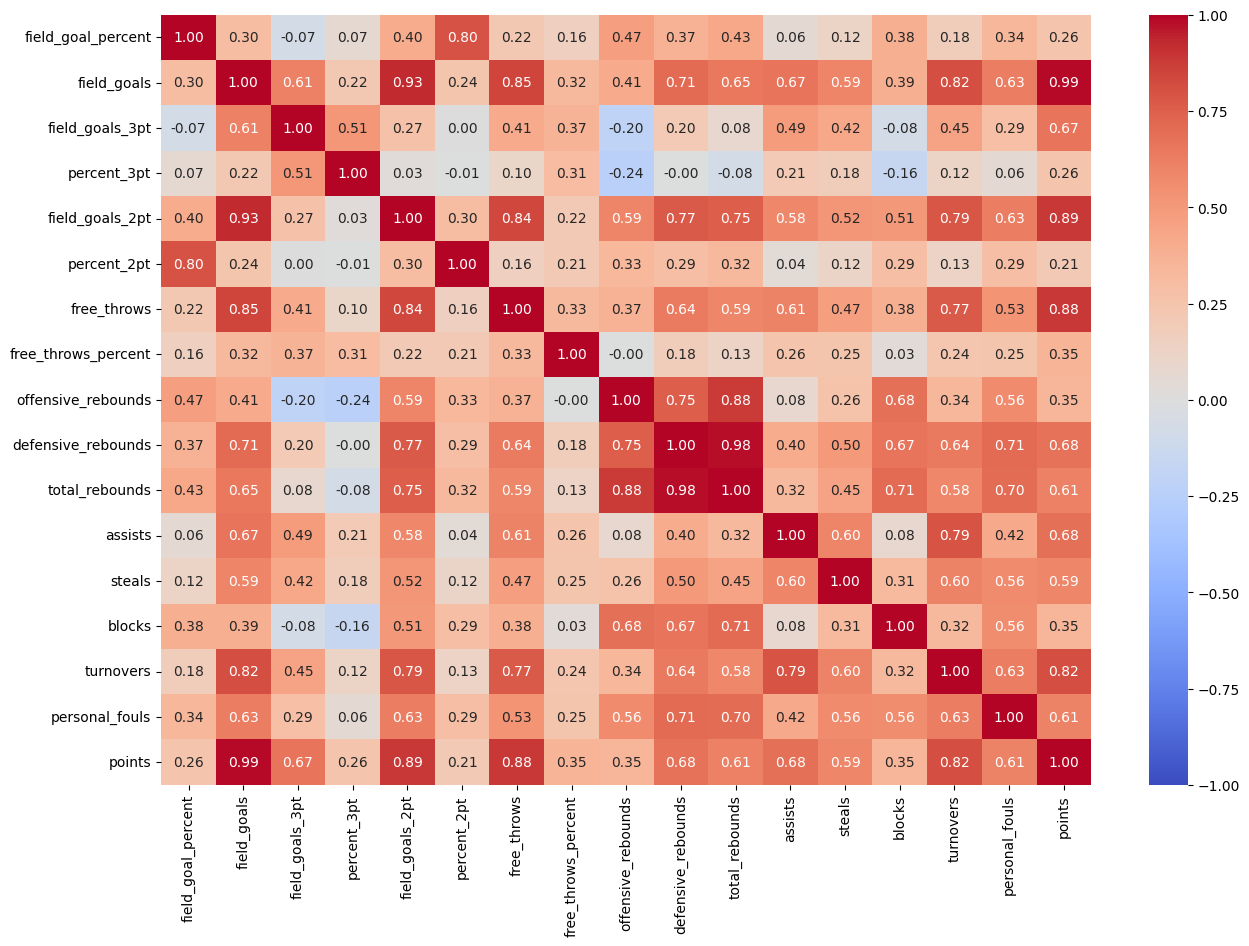

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter for numeric columns
numeric_df = nba_player_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Identify Key Factors
key_factors = ['field_goal_percent', 'field_goals', 'field_goals_3pt', 'percent_3pt', 'field_goals_2pt', 'percent_2pt', 
               'free_throws', 'free_throws_percent', 'offensive_rebounds', 'defensive_rebounds', 'total_rebounds', 
               'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls', 'points']

# Calculate the correlation matrix for the key factors
key_factors_corr_matrix = nba_player_df[key_factors].corr()

# Display the plot
plt.figure(figsize=(15, 10))
sns.heatmap(key_factors_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

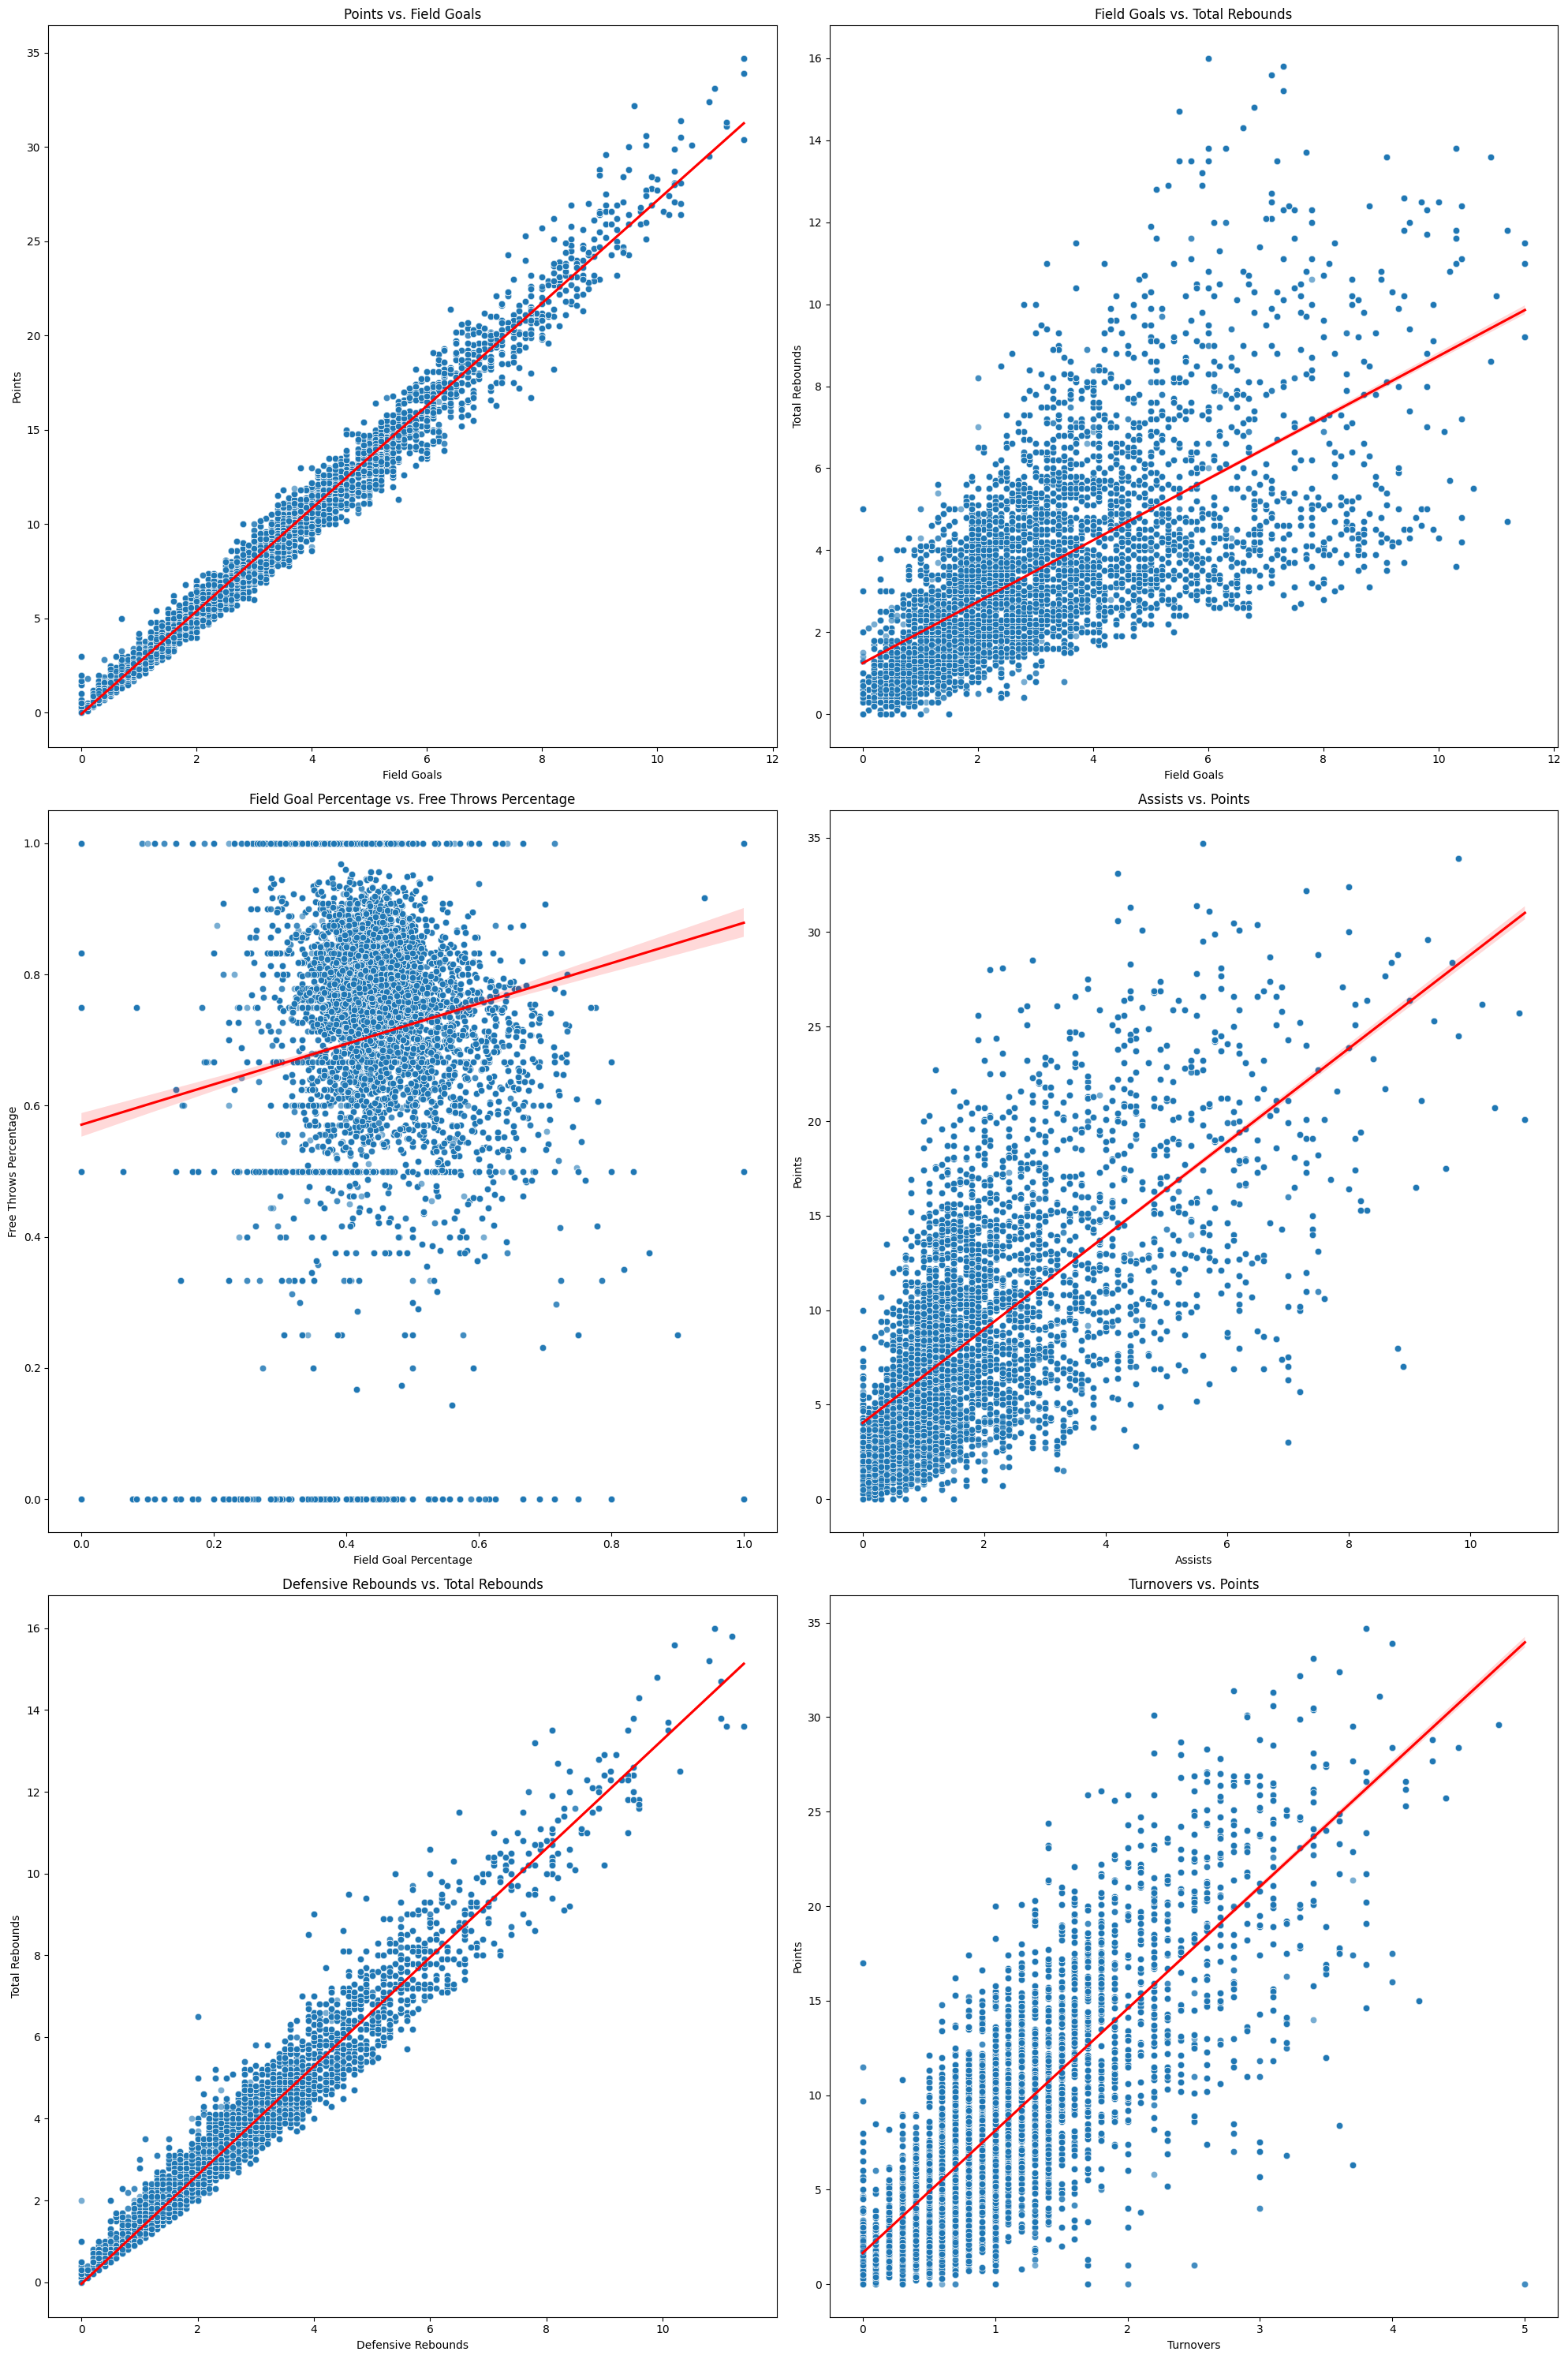

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(20, 30))

# Points vs. Field Goals
sns.scatterplot(x='field_goals', y='points', data=nba_player_df, ax=axes[0, 0], alpha=0.6)
sns.regplot(x='field_goals', y='points', data=nba_player_df, ax=axes[0, 0], scatter=False, color='red')
axes[0, 0].set_title('Points vs. Field Goals')
axes[0, 0].set_xlabel('Field Goals')
axes[0, 0].set_ylabel('Points')

# Field Goals vs. Total Rebounds
sns.scatterplot(x='field_goals', y='total_rebounds', data=nba_player_df, ax=axes[0, 1], alpha=0.6)
sns.regplot(x='field_goals', y='total_rebounds', data=nba_player_df, ax=axes[0, 1], scatter=False, color='red')
axes[0, 1].set_title('Field Goals vs. Total Rebounds')
axes[0, 1].set_xlabel('Field Goals')
axes[0, 1].set_ylabel('Total Rebounds')

# Field Goal Percentage vs. Free Throws Percentage
sns.scatterplot(x='field_goal_percent', y='free_throws_percent', data=nba_player_df, ax=axes[1, 0], alpha=0.6)
sns.regplot(x='field_goal_percent', y='free_throws_percent', data=nba_player_df, ax=axes[1, 0], scatter=False, color='red')
axes[1, 0].set_title('Field Goal Percentage vs. Free Throws Percentage')
axes[1, 0].set_xlabel('Field Goal Percentage')
axes[1, 0].set_ylabel('Free Throws Percentage')

# Assists vs. Points
sns.scatterplot(x='assists', y='points', data=nba_player_df, ax=axes[1, 1], alpha=0.6)
sns.regplot(x='assists', y='points', data=nba_player_df, ax=axes[1, 1], scatter=False, color='red')
axes[1, 1].set_title('Assists vs. Points')
axes[1, 1].set_xlabel('Assists')
axes[1, 1].set_ylabel('Points')

# Defensive Rebounds vs. Total Rebounds
sns.scatterplot(x='defensive_rebounds', y='total_rebounds', data=nba_player_df, ax=axes[2, 0], alpha=0.6)
sns.regplot(x='defensive_rebounds', y='total_rebounds', data=nba_player_df, ax=axes[2, 0], scatter=False, color='red')
axes[2, 0].set_title('Defensive Rebounds vs. Total Rebounds')
axes[2, 0].set_xlabel('Defensive Rebounds')
axes[2, 0].set_ylabel('Total Rebounds')

# Turnovers vs. Points
sns.scatterplot(x='turnovers', y='points', data=nba_player_df, ax=axes[2, 1], alpha=0.6)
sns.regplot(x='turnovers', y='points', data=nba_player_df, ax=axes[2, 1], scatter=False, color='red')
axes[2, 1].set_title('Turnovers vs. Points')
axes[2, 1].set_xlabel('Turnovers')
axes[2, 1].set_ylabel('Points')

# Adjust layout
plt.tight_layout()
plt.show()


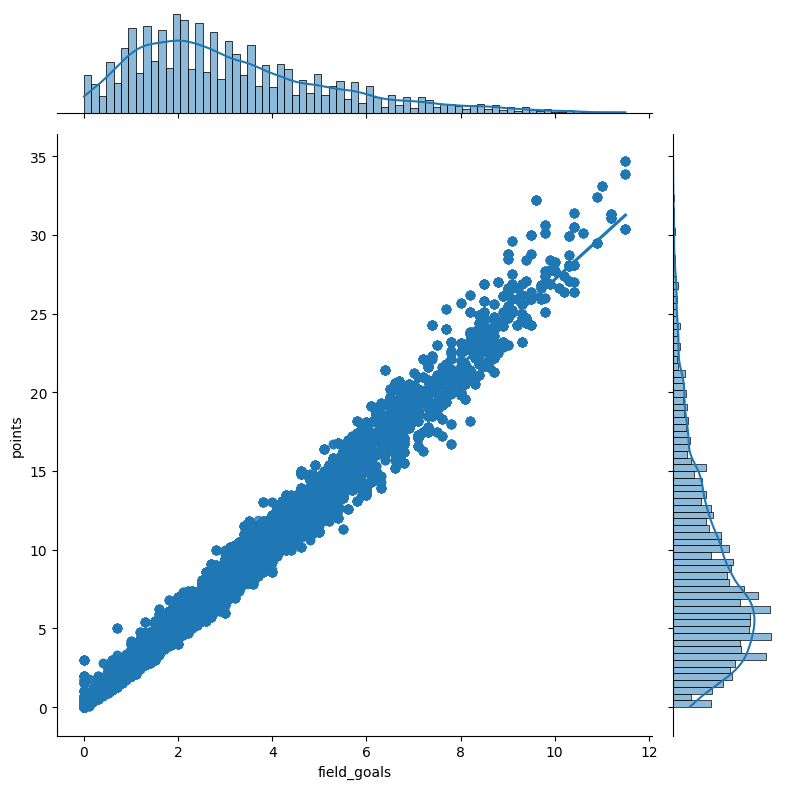

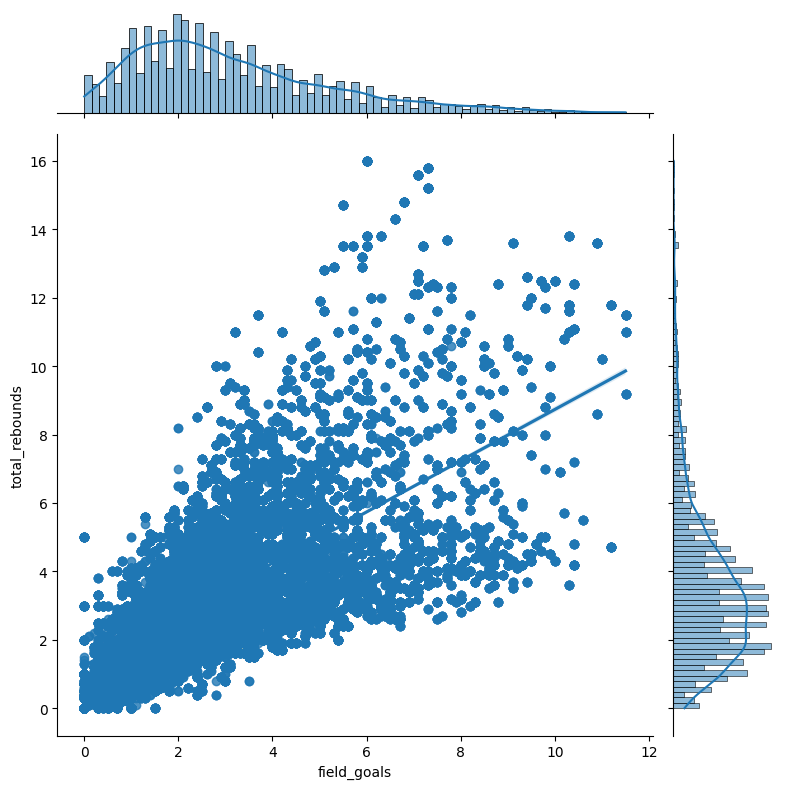

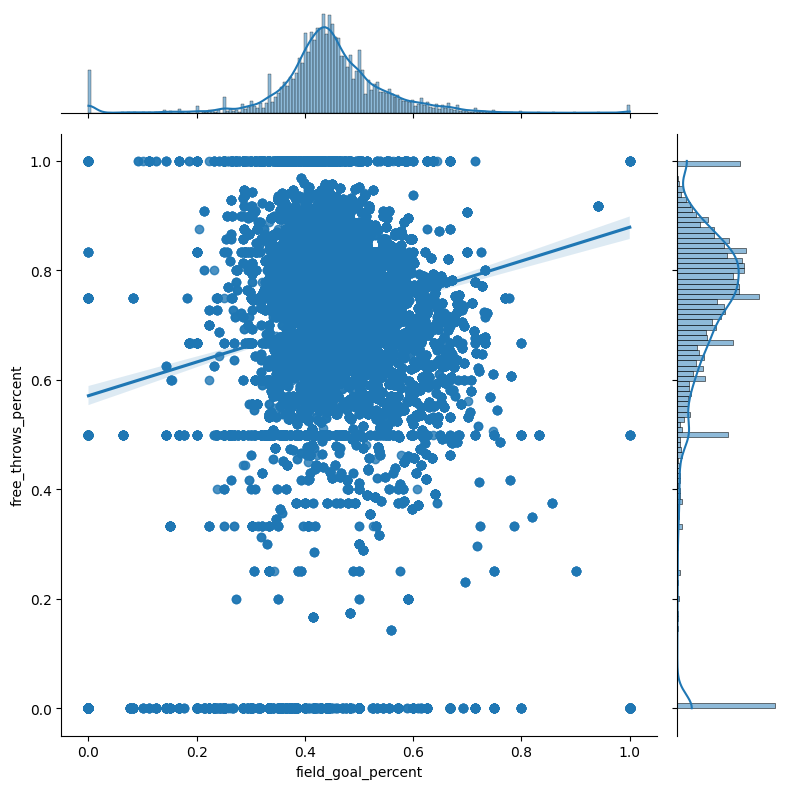

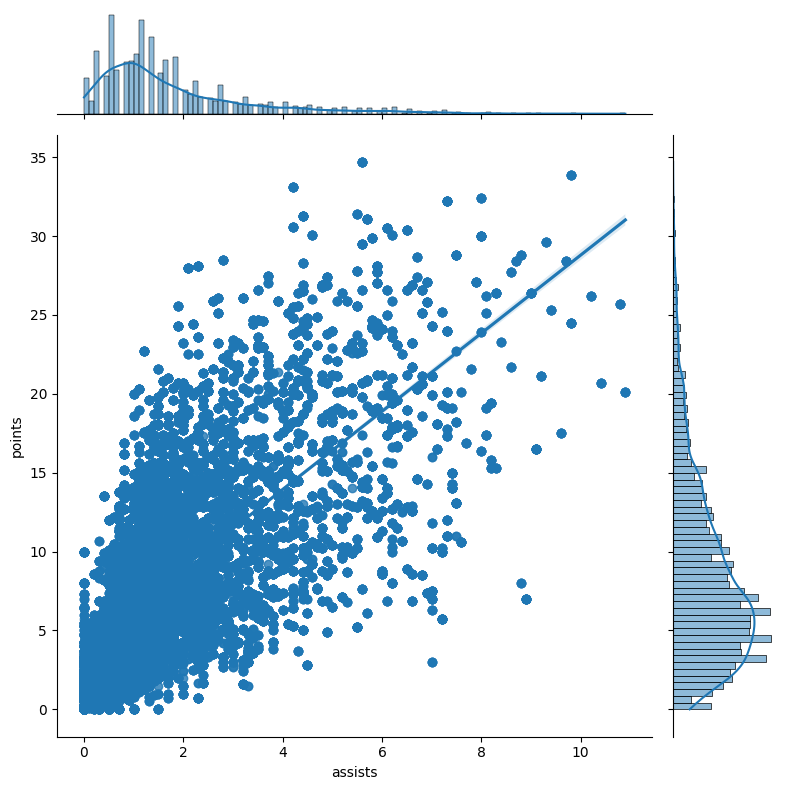

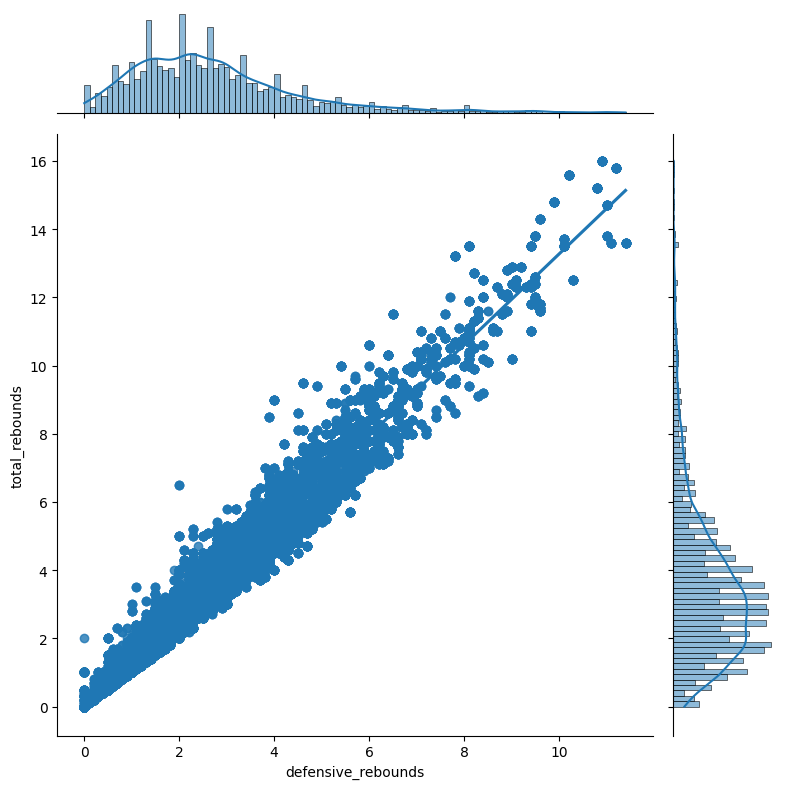

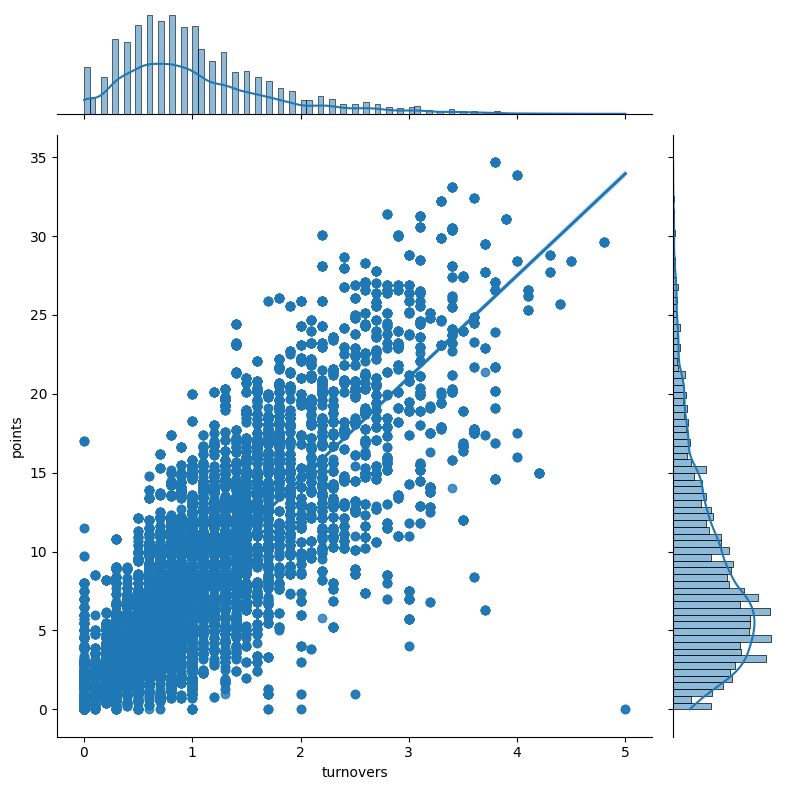

In [40]:
import seaborn as sns

# Points vs. Field Goals
sns.jointplot(x='field_goals', y='points', data=nba_player_df, kind='reg', height=8)

# Field Goals vs. Total Rebounds
sns.jointplot(x='field_goals', y='total_rebounds', data=nba_player_df, kind='reg', height=8)

# Field Goal Percentage vs. Free Throws Percentage
sns.jointplot(x='field_goal_percent', y='free_throws_percent', data=nba_player_df, kind='reg', height=8)

# Assists vs. Points
sns.jointplot(x='assists', y='points', data=nba_player_df, kind='reg', height=8)

# Defensive Rebounds vs. Total Rebounds
sns.jointplot(x='defensive_rebounds', y='total_rebounds', data=nba_player_df, kind='reg', height=8)

# Turnovers vs. Points
sns.jointplot(x='turnovers', y='points', data=nba_player_df, kind='reg', height=8)

plt.show()

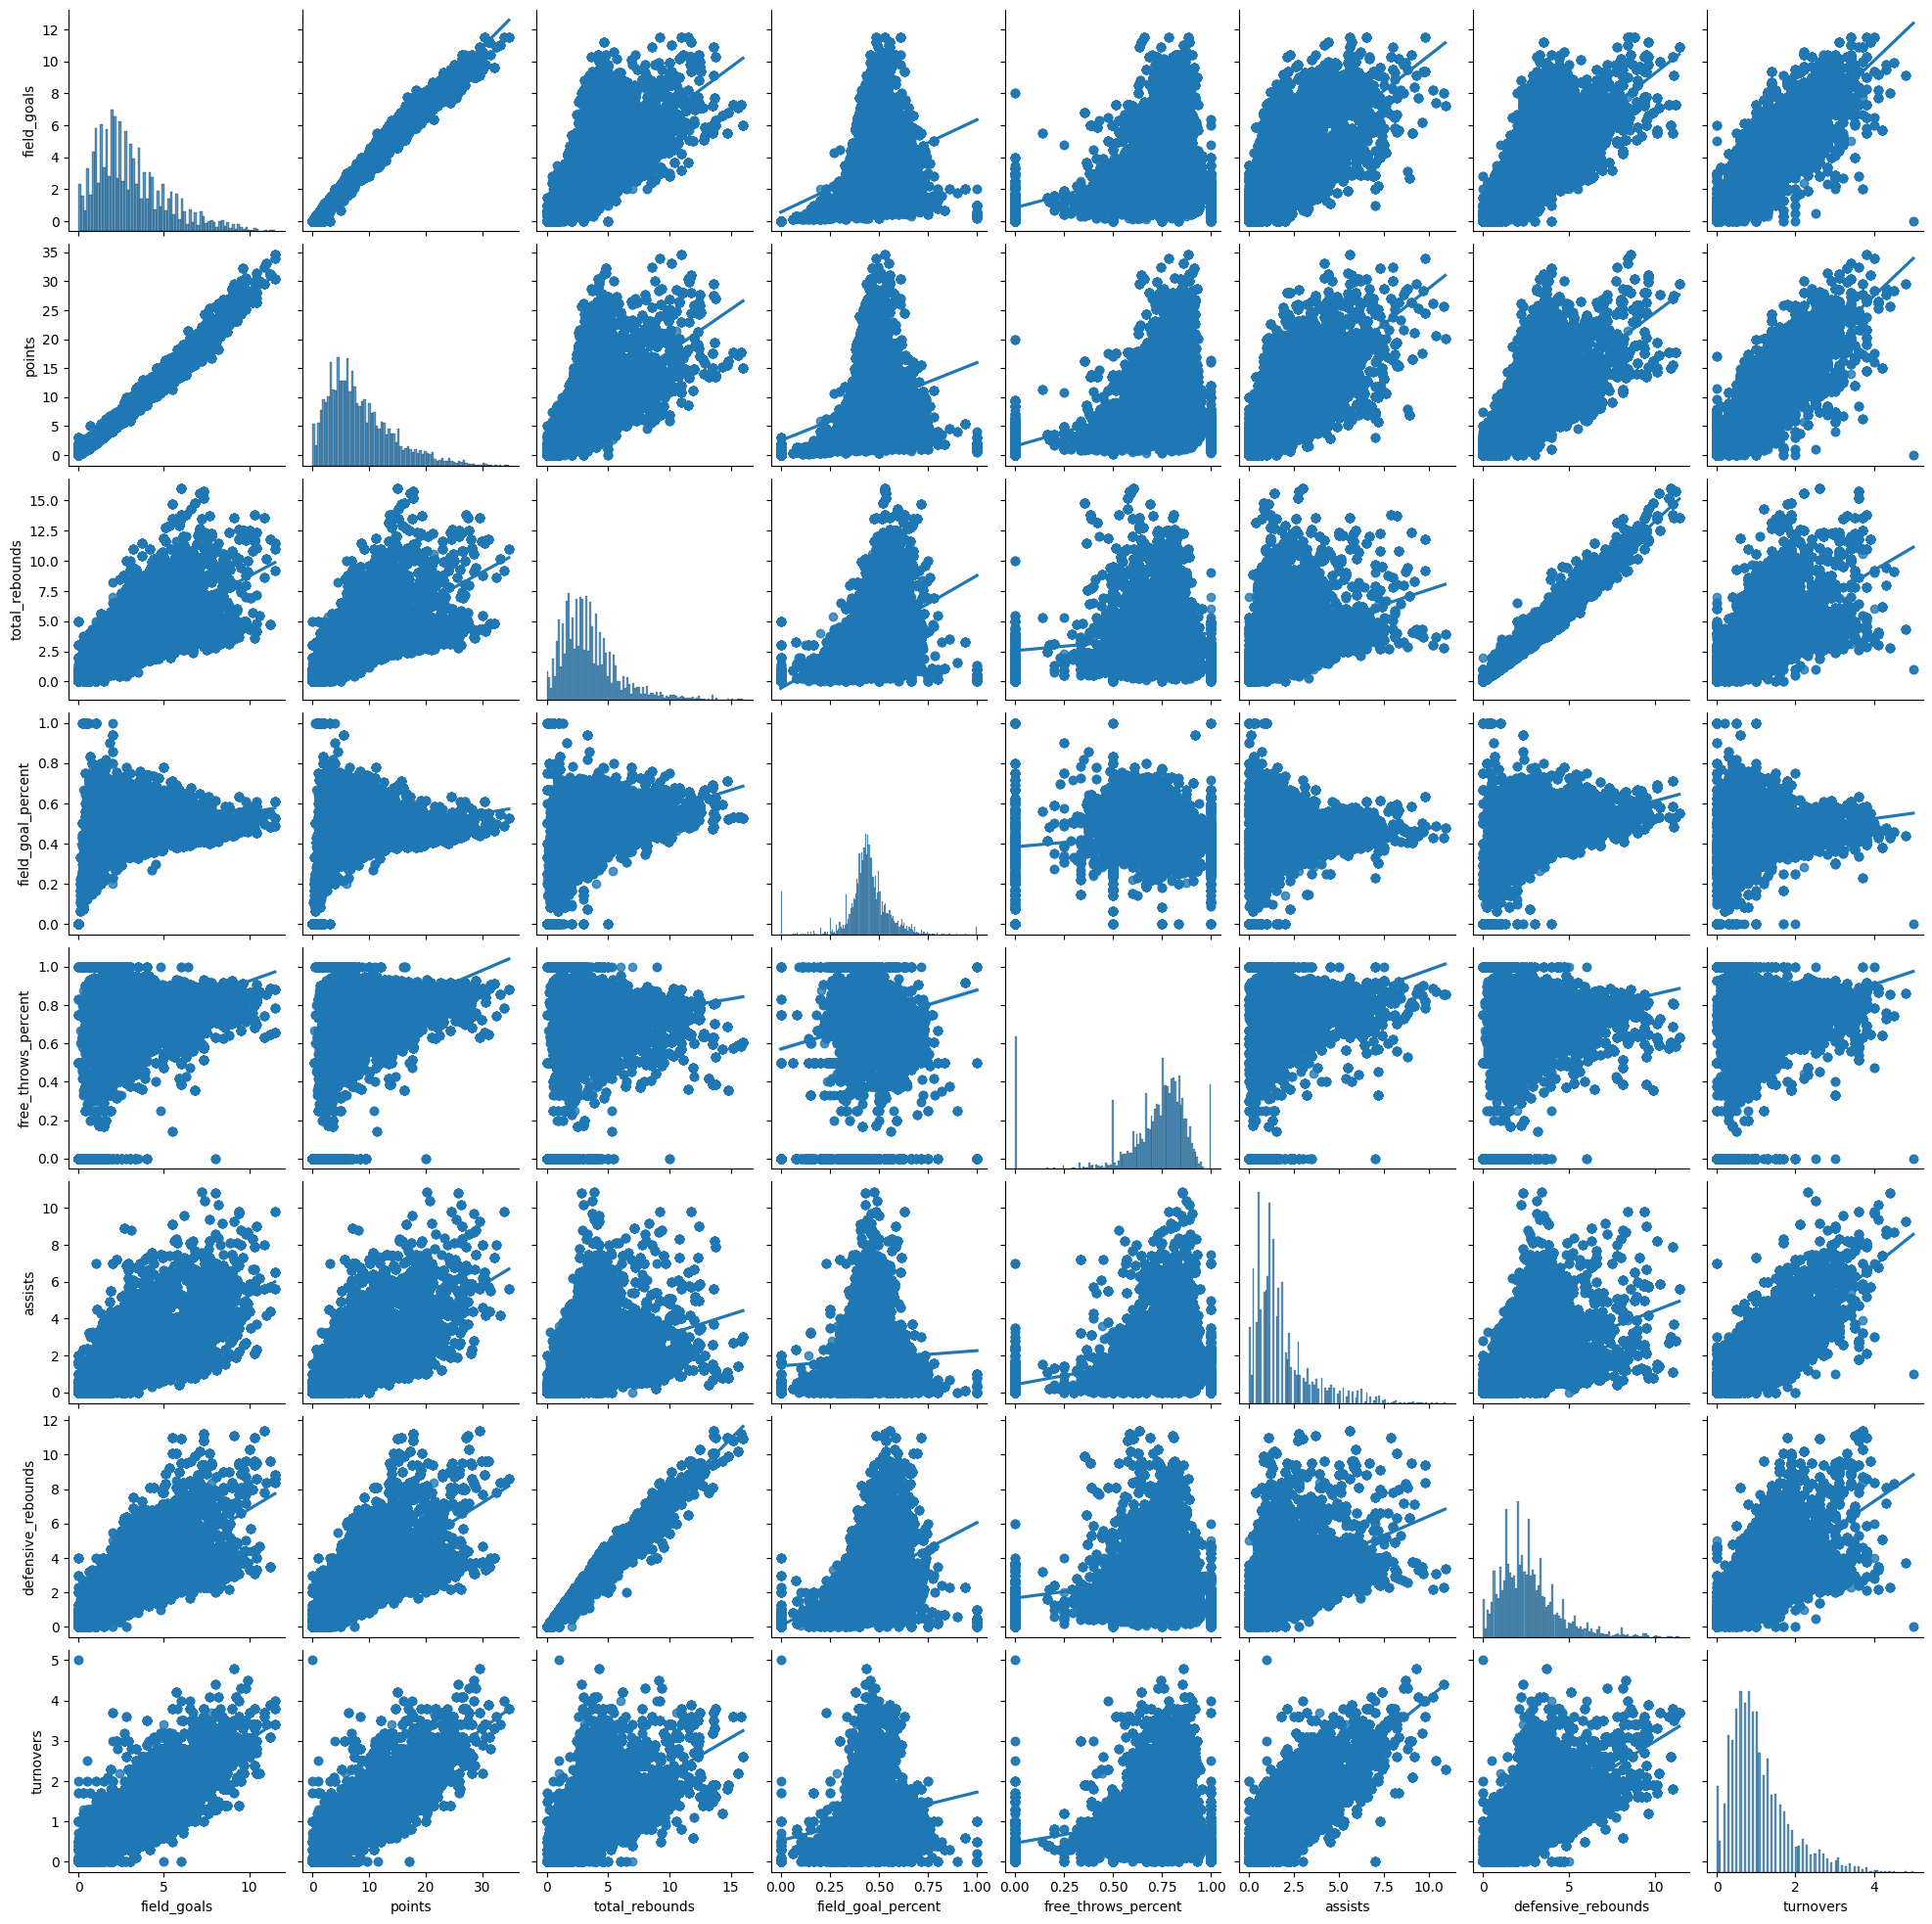

In [41]:
sns.pairplot(nba_player_df[['field_goals', 'points', 'total_rebounds', 'field_goal_percent', 'free_throws_percent', 'assists', 'defensive_rebounds', 'turnovers']], kind='reg')
plt.show()

In [42]:
# field_goals, points, and total_rebounds have right-skewed distributions, while variables like free_throws_percent and field_goal_percent have distributions with distinct clustering or gaps.
# Points vs. Field Goals: There is a strong positive correlation, indicating that players who score more field goals tend to have higher points.
# Total Rebounds vs. Field Goals: There is a moderate positive correlation, suggesting that players with more field goals also tend to have more total rebounds
# Free Throws Percent vs. Field Goals: The relationship seems weaker, indicating that field goals may not directly predict free throw percentage.
# Assists vs. Points: There is a moderate positive correlation, suggesting players who assist more also tend to score more points.
# Strong Correlations: Points and Field Goals Total Rebounds/ Points and Assists
# Potential Data Transformations:Right-skewed distributions (e.g., points, total rebounds) might benefit from transformations (e.g., log transformation) to achieve normality.


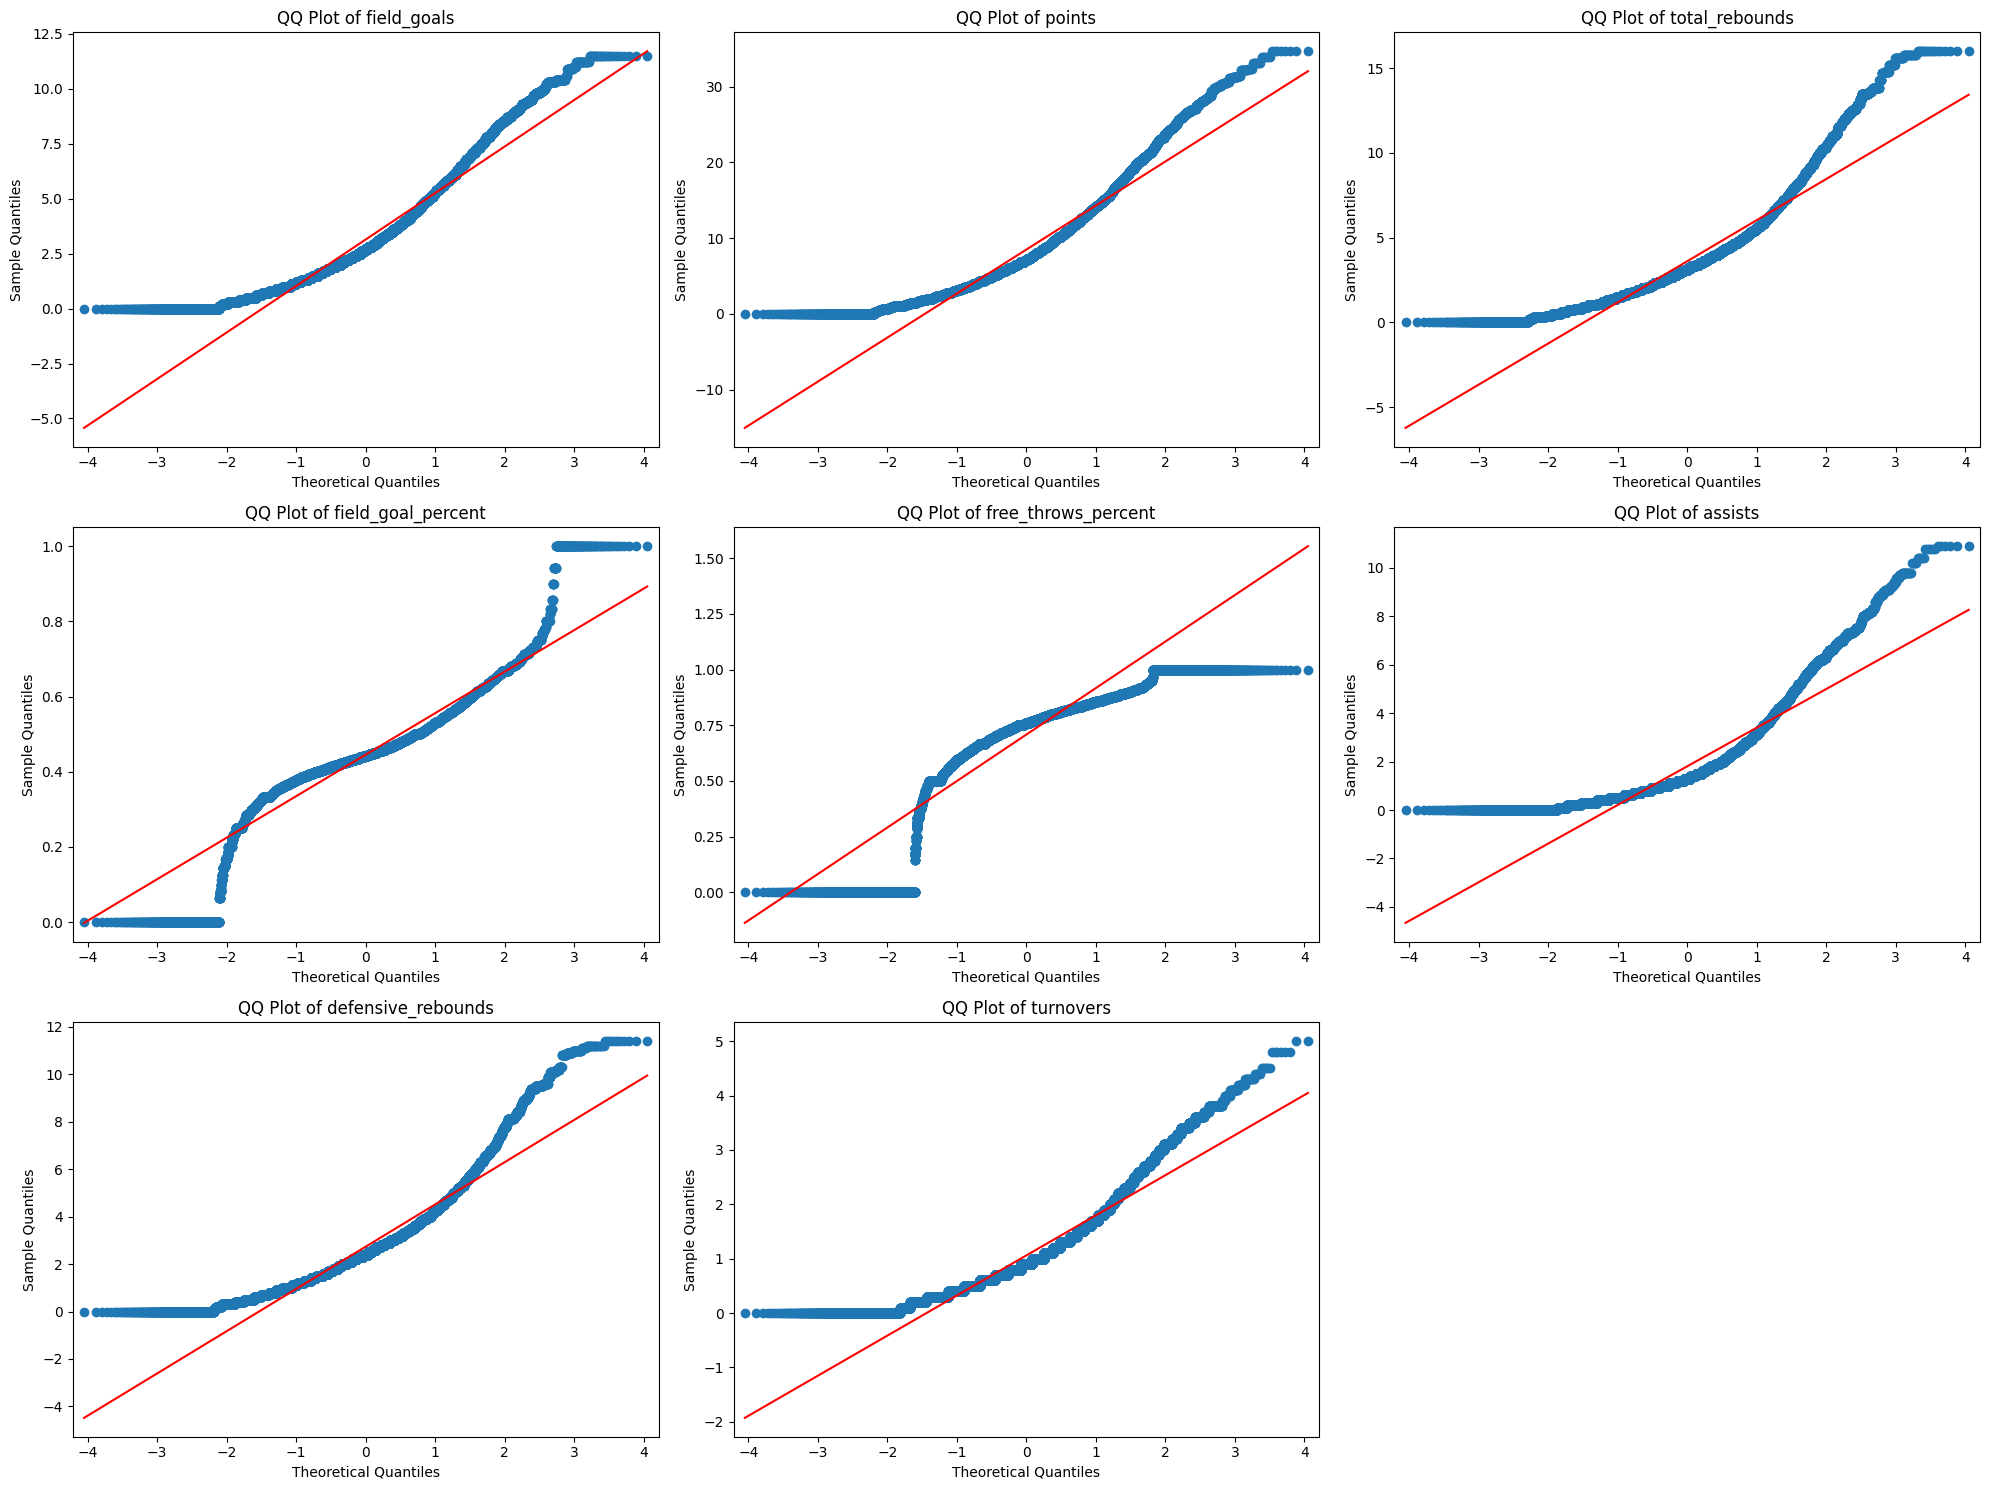

In [45]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define a function to create QQ plots for multiple columns
def qq_plot(data, columns):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sm.qqplot(data[col].dropna(), line='s', ax=plt.gca())
        plt.title(f'QQ Plot of {col}')
    plt.tight_layout()
    plt.show()

# List of columns to generate QQ plots for
columns = ['field_goals', 'points', 'total_rebounds', 'field_goal_percent', 'free_throws_percent', 'assists', 'defensive_rebounds', 'turnovers']

# Generate QQ plots
qq_plot(nba_player_df, columns)


In [46]:
# Field Goals, Points, Total Rebounds, Assists, Defensive Rebounds: The points show a pronounced curve, indicating that these variables are not normally distributed and have heavier tails than the normal distribution.
# Field Goal Percentage, Free Throws Percentage: The points deviate from the reference line, suggesting that these percentages are not normally distributed and show significant skewness and/or heavy tails.
# Turnovers: Similar to other performance metrics, turnovers also deviate from the reference line, indicating non-normality.

In [47]:
# Implications
# Data Transformation: Since many of variables are not normally distributed, might consider data transformations (e.g., log transformation, Box-Cox transformation) to achieve normality, which can be beneficial for certain statistical analyses and models.
# Robust Methods: If transformation is not feasible or does not achieve normality, consider using robust statistical methods that do not assume normality.
# Model Selection: Some machine learning algorithms (e.g., tree-based methods like Random Forests and Gradient Boosting) do not assume normality and can handle skewed distributions well.

## Feature Engineering

In [48]:
nba_player_df.columns

Index(['player_id', 'season_id', 'season', 'player_name', 'position', 'age',
       'experience', 'league', 'team', 'games_played', 'games_started',
       'mins_per_game', 'field_goals', 'field_goals_attempt',
       'field_goal_percent', 'field_goals_3pt', 'attempts_3pt', 'percent_3pt',
       'field_goals_2pt', 'attempts_2pt', 'percent_2pt',
       'effective_field_goal_percent', 'free_throws', 'free_throws_attempt',
       'free_throws_percent', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points', 'average_shot_distance',
       'field_goal_attempts_percent_2pt_range',
       'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range',
       'field_goal_percent_3pt_range', 'field_goal_assist_percent_2pt_range',
       'field_goal_assist_percent_3pt_range',
       'field_goal_attempts_dunk_percent', 'num_of_dunks',
       'corner_3pt_percent', 'num_heaves_attempted', 'num_heav

In [49]:
num_players = len(nba_player_df['player_name'].unique())
print(f'Number of players: {num_players}')

Number of players: 1148


In [50]:
nba_player_df['position'].unique()

array(['SG', 'SF', 'PF', 'PG', 'C', 'SF-PF', 'PG-SG', 'SF-SG', 'C-PF',
       'SG-PG', 'PF-C', 'PF-SF', 'SG-SF', 'SG-PG-SF'], dtype=object)

In [51]:
nba_player_df['personal_fouls'].unique()

array([0.9, 0.5, 0.3, 1.9, 1.6, 3.3, 1.2, 0. , 0.6, 0.4, 0.8, 2.5, 1.4,
       0.2, 2.3, 1.5, 1.8, 2.1, 1. , 2.8, 2.2, 2.4, 2. , 1.7, 1.3, 1.1,
       0.7, 0.1, 3.1, 2.6, 2.9, 3. , 2.7, 3.6, 3.5, 3.2, 3.4, 3.8, 4. ,
       5. , 3.7, 4.1, 4.9])

In [52]:
nba_player_df['position'].value_counts()

position
SG          9369
C           7760
SF          7720
PF          6956
PG          6637
SF-SG        135
PF-SF        105
PG-SG         91
SF-PF         88
C-PF          77
SG-PG         67
PF-C          63
SG-SF         58
SG-PG-SF       9
Name: count, dtype: int64

In [53]:
# Output Columns: Player Performance (Low/High Performance Players): Performance value of player
# Input Columns: player_name, season, league, team, games_played, mins_per_game, points, conversion_rate (based on point range scored/attempts), num_seasons, assists

In [54]:
nba_player_df.columns

Index(['player_id', 'season_id', 'season', 'player_name', 'position', 'age',
       'experience', 'league', 'team', 'games_played', 'games_started',
       'mins_per_game', 'field_goals', 'field_goals_attempt',
       'field_goal_percent', 'field_goals_3pt', 'attempts_3pt', 'percent_3pt',
       'field_goals_2pt', 'attempts_2pt', 'percent_2pt',
       'effective_field_goal_percent', 'free_throws', 'free_throws_attempt',
       'free_throws_percent', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points', 'average_shot_distance',
       'field_goal_attempts_percent_2pt_range',
       'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range',
       'field_goal_percent_3pt_range', 'field_goal_assist_percent_2pt_range',
       'field_goal_assist_percent_3pt_range',
       'field_goal_attempts_dunk_percent', 'num_of_dunks',
       'corner_3pt_percent', 'num_heaves_attempted', 'num_heav

In [55]:
nba_player_df

,player_id,season_id,season,player_name,position,age,experience,league,team,games_played,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
0,5025,31136,2024,A.J. Green,SG,24.0,2,NBA,MIL,56,...,0.942,0.000,0.0,0.447,0.0,0.0,False,2,2023,2024
1,5025,31136,2024,A.J. Green,SG,24.0,2,NBA,MIL,56,...,0.909,0.000,0.0,0.409,0.0,0.0,False,2,2023,2024
2,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,42,...,1.000,0.107,12.0,0.250,0.0,0.0,False,2,2023,2024
3,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,42,...,1.000,0.136,5.0,0.214,0.0,0.0,False,2,2023,2024
4,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,42,...,0.000,1.000,1.0,0.000,0.0,0.0,False,2,2023,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82773,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,0.696,0.071,24.0,0.240,2.0,0.0,False,11,2013,2023
82774,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,0.250,0.080,8.0,0.250,1.0,0.0,False,11,2013,2023
82775,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,0.789,0.067,16.0,0.235,1.0,0.0,False,11,2013,2023
82776,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,0.800,0.109,16.0,0.400,1.0,0.0,False,11,2013,2023


In [56]:
nba_player_df[['player_id', 'player_name', 'points','team', 'mins_per_game']]

,player_id,player_name,points,team,mins_per_game
0,5025,A.J. Green,4.5,MIL,11.0
1,5025,A.J. Green,4.5,MIL,11.0
2,5026,A.J. Lawson,3.2,DAL,7.4
3,5026,A.J. Lawson,3.2,DAL,7.4
4,5026,A.J. Lawson,3.2,DAL,7.4
...,...,...,...,...,...
82773,4140,Will Barton,4.0,POR,12.2
82774,4140,Will Barton,4.0,POR,12.2
82775,4140,Will Barton,4.0,POR,12.2
82776,4140,Will Barton,4.0,POR,12.2


In [57]:
points_mean = nba_player_df.groupby('player_id')['points'].mean().to_dict()
nba_player_df['player_points'] = nba_player_df['player_id'].map(points_mean)

mins_mean = nba_player_df.groupby('player_id')['mins_per_game'].mean().to_dict()
nba_player_df['player_game_time'] = nba_player_df['player_id'].map(mins_mean)

nba_player_df['points_mins_ratio'] = nba_player_df['player_points'] / nba_player_df['player_game_time']

In [58]:
nba_player_df['points_mins_ratio'] = nba_player_df['points_mins_ratio'].apply(lambda x: round(x, 2))

nba_player_df[['player_id', 'player_name', 'points','mins_per_game', 'player_points', 'player_game_time', 'points_mins_ratio']]

,player_id,player_name,points,mins_per_game,player_points,player_game_time,points_mins_ratio
0,5025,A.J. Green,4.5,11.0,4.450000,10.450000,0.43
1,5025,A.J. Green,4.5,11.0,4.450000,10.450000,0.43
2,5026,A.J. Lawson,3.2,7.4,3.200000,6.050000,0.53
3,5026,A.J. Lawson,3.2,7.4,3.200000,6.050000,0.53
4,5026,A.J. Lawson,3.2,7.4,3.200000,6.050000,0.53
...,...,...,...,...,...,...,...
82773,4140,Will Barton,4.0,12.2,9.706667,22.493333,0.43
82774,4140,Will Barton,4.0,12.2,9.706667,22.493333,0.43
82775,4140,Will Barton,4.0,12.2,9.706667,22.493333,0.43
82776,4140,Will Barton,4.0,12.2,9.706667,22.493333,0.43


In [59]:
nba_grouped_df = (nba_player_df.groupby('player_id').agg({'steals': 'mean', 'blocks': 'mean', 'turnovers': 'mean'}).reset_index())

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(nba_grouped_df[['steals', 'blocks', 'turnovers']])

In [61]:
scaled_df = pd.DataFrame(scaled_data, columns=['scaled_steals', 'scaled_blocks', 'scaled_turnovers'])

grouped_df = pd.concat([nba_grouped_df[['player_id']], scaled_df], axis=1)

weight_steals = 0.4
weight_blocks = 0.4
weight_turnovers = -0.2

# Calculate the defense metric 
grouped_df['defensive_metric'] = (grouped_df['scaled_steals'] * weight_steals + grouped_df['scaled_blocks'] * weight_blocks + grouped_df['scaled_turnovers'] * weight_turnovers)

In [62]:
grouped_df

,player_id,scaled_steals,scaled_blocks,scaled_turnovers,defensive_metric
0,4063,0.370370,0.055556,0.281746,0.114021
1,4064,0.805898,0.350309,0.502646,0.361954
2,4065,0.194004,0.071429,0.153061,0.075561
3,4066,0.823045,0.629630,0.476190,0.485832
4,4067,0.339506,0.069444,0.119048,0.139771
...,...,...,...,...,...
1142,5205,0.246914,0.305556,0.166667,0.187654
1143,5206,0.205761,0.212963,0.261905,0.115109
1144,5207,0.308642,0.194444,0.238095,0.153616
1145,5208,0.308642,0.027778,0.396825,0.055203


In [63]:
nba_player_df = pd.merge(nba_player_df, grouped_df[['player_id', 'defensive_metric']], on='player_id', how='left')

In [64]:
nba_player_df[['steals', 'blocks', 'turnovers', 'defensive_metric']]

,steals,blocks,turnovers,defensive_metric
0,0.2,0.1,0.2,0.043034
1,0.2,0.1,0.2,0.043034
2,0.2,0.1,0.3,0.019136
3,0.2,0.1,0.3,0.019136
4,0.2,0.1,0.3,0.019136
...,...,...,...,...
39130,0.5,0.1,0.8,0.157296
39131,0.5,0.1,0.8,0.157296
39132,0.5,0.1,0.8,0.157296
39133,0.5,0.1,0.8,0.157296


In [65]:
nba_player_df['defensive_metric'] = nba_player_df['defensive_metric'].apply(lambda x: round(x, 2))

In [66]:
nba_player_df[['player_id', 'points_mins_ratio', 'total_rebounds', 'defensive_metric']]

,player_id,points_mins_ratio,total_rebounds,defensive_metric
0,5025,0.43,1.1,0.04
1,5025,0.43,1.1,0.04
2,5026,0.53,1.2,0.02
3,5026,0.53,1.2,0.02
4,5026,0.53,1.2,0.02
...,...,...,...,...
39130,4140,0.43,2.0,0.16
39131,4140,0.43,2.0,0.16
39132,4140,0.43,2.0,0.16
39133,4140,0.43,2.0,0.16


In [67]:
min_point = nba_player_df['points_mins_ratio'].min()
max_point = nba_player_df['points_mins_ratio'].max()

min_rebound = nba_player_df['total_rebounds'].min()
max_rebound = nba_player_df['total_rebounds'].max()

min_defensive = nba_player_df['defensive_metric'].min()
max_defensive = nba_player_df['defensive_metric'].max()

print(f'Min value points_mins_ratio: {min_point}, Max value points_mins_ratio: {max_point}')
print(f'Min value total rebounds: {min_rebound}, Max value total rebounds: {max_rebound}')
print(f'Min value defensive metric: {min_defensive}, Max value defensive metric: {max_defensive}')

Min value points_mins_ratio: 0.0, Max value points_mins_ratio: 2.0
Min value total rebounds: 0.0, Max value total rebounds: 16.0
Min value defensive metric: -0.08, Max value defensive metric: 0.52


In [68]:
# Normalizing the data based on a scale from 0-1 and then multiply by their weights to get player rating

weight_points = 0.45
weight_rebound = 0.2
weight_defensive = 0.35

nba_player_df['norm_points_mins_ratio'] = ((nba_player_df['points_mins_ratio'] - min_point) / (max_point - min_point))
nba_player_df['norm_rebounds'] = ((nba_player_df['total_rebounds'] - min_rebound) / (max_rebound - min_rebound))
nba_player_df['norm_defensive_metric'] = ((nba_player_df['defensive_metric'] - min_defensive) / (max_defensive - min_defensive))

In [69]:
nba_player_df['norm_points_mins_ratio'] = nba_player_df['norm_points_mins_ratio'].apply(lambda x: round(x, 2))
nba_player_df['norm_rebounds'] = nba_player_df['norm_rebounds'].apply(lambda x: round(x, 2))
nba_player_df['norm_defensive_metric'] = nba_player_df['norm_defensive_metric'].apply(lambda x: round(x, 2))

# Get a player rating scale between 1-5
nba_player_df['player_rating'] = ((nba_player_df['norm_points_mins_ratio'] * weight_points) + (nba_player_df['norm_rebounds'] * weight_rebound) +
                                (nba_player_df['norm_defensive_metric'] * weight_defensive)) * 5


In [70]:
nba_player_df[['norm_points_mins_ratio', 'norm_rebounds', 'norm_defensive_metric', 'player_rating']]

,norm_points_mins_ratio,norm_rebounds,norm_defensive_metric,player_rating
0,0.21,0.07,0.20,0.8925
1,0.21,0.07,0.20,0.8925
2,0.27,0.07,0.17,0.9750
3,0.27,0.07,0.17,0.9750
4,0.27,0.07,0.17,0.9750
...,...,...,...,...
39130,0.21,0.12,0.40,1.2925
39131,0.21,0.12,0.40,1.2925
39132,0.21,0.12,0.40,1.2925
39133,0.21,0.12,0.40,1.2925


In [71]:
nba_player_df['player_rating'] = nba_player_df['player_rating'].apply(lambda x: round(x, 2))

In [72]:
nba_player_df['player_rating'].describe()

count    39135.000000
mean         1.360857
std          0.396022
min          0.090000
25%          1.080000
50%          1.310000
75%          1.570000
max          3.240000
Name: player_rating, dtype: float64

In [73]:
range_rating = nba_player_df['player_rating'].quantile([0.4, 0.5, 0.6, 0.7, 0.8])
print(range_rating)

0.4    1.22
0.5    1.31
0.6    1.41
0.7    1.53
0.8    1.64
Name: player_rating, dtype: float64


In [74]:
# Considering 70 quantile value of player_rating as a threshold
# 70 quantile value: 1.53

nba_player_df['player_performance_metric'] = nba_player_df['player_rating'].apply(lambda x: 1 if x >= 1.53 else 0)

In [75]:
nba_player_df['player_performance'] = nba_player_df['player_performance_metric'].apply(lambda x: 'High Performance' if x == 1 else 'Low Performance')

In [76]:
nba_player_df[['player_performance_metric', 'player_performance']].sort_values(by = 'player_performance_metric')

,player_performance_metric,player_performance
39134,0,Low Performance
39133,0,Low Performance
39132,0,Low Performance
39131,0,Low Performance
39130,0,Low Performance
...,...,...
61,1,High Performance
62,1,High Performance
63,1,High Performance
18,1,High Performance


In [77]:
print(nba_player_df['player_performance'].value_counts())

player_performance
Low Performance     27378
High Performance    11757
Name: count, dtype: int64


## Data Modelling

In [78]:
# Input Variables: 'position', 'age', 'experience', 'games_played', 'games_started', 'personal_fouls', 'average_shot_distance', 'num_seasons'

# Output Variables: 
# player_performance: Points_min_ratio('points'/'mins_per_game'), Rebounds('total_rebounds'), Defence (steals, blocks, turnovers)

In [79]:
# One-hot encoding for the position column
encoded_position = pd.get_dummies(nba_player_df['position'], prefix='position')

nba_player_df = pd.concat([nba_player_df, encoded_position], axis=1)

In [80]:
nba_player_df.columns

Index(['player_id', 'season_id', 'season', 'player_name', 'position', 'age',
       'experience', 'league', 'team', 'games_played', 'games_started',
       'mins_per_game', 'field_goals', 'field_goals_attempt',
       'field_goal_percent', 'field_goals_3pt', 'attempts_3pt', 'percent_3pt',
       'field_goals_2pt', 'attempts_2pt', 'percent_2pt',
       'effective_field_goal_percent', 'free_throws', 'free_throws_attempt',
       'free_throws_percent', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points', 'average_shot_distance',
       'field_goal_attempts_percent_2pt_range',
       'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range',
       'field_goal_percent_3pt_range', 'field_goal_assist_percent_2pt_range',
       'field_goal_assist_percent_3pt_range',
       'field_goal_attempts_dunk_percent', 'num_of_dunks',
       'corner_3pt_percent', 'num_heaves_attempted', 'num_heav

In [81]:
model_df = nba_player_df.groupby('player_id').agg({
    'position_C' : 'max', 
    'position_C-PF' : 'max', 
    'position_PF' : 'max',
    'position_PF-C' : 'max', 
    'position_PF-SF' : 'max', 
    'position_PG': 'max', 
    'position_PG-SG' : 'max',
    'position_SF' : 'max', 
    'position_SF-PF' : 'max', 
    'position_SF-SG' : 'max', 
    'position_SG' : 'max',
    'position_SG-PG' : 'max', 
    'position_SG-PG-SF' : 'max', 
    'position_SG-SF' : 'max',  
    'age': 'mean', 
    'experience': 'mean',
    'games_played': 'mean',
    'games_started': 'mean',  
    'personal_fouls': 'mean',
    'average_shot_distance': 'mean',
    'num_seasons': 'mean',
    'player_rating': 'mean'
})

# Reset index to convert the groupby object back to a DataFrame
model_df.reset_index(inplace=True)

# Split data into input and output variables

X = model_df[['position_C', 'position_C-PF', 'position_PF', 'position_PF-C', 'position_PF-SF', 'position_PG', 'position_PG-SG',
       'position_SF', 'position_SF-PF', 'position_SF-SG', 'position_SG', 'position_SG-PG', 'position_SG-PG-SF', 'position_SG-SF', 
       'age', 'experience', 'games_played', 'games_started', 'personal_fouls', 'average_shot_distance', 'num_seasons']]

y =  model_df['player_rating']

In [82]:
# Training and Testing the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions
y_pred = lin_model.predict(X_test)

In [84]:
# Model Evaluation
mse_score = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
mae_score = mean_absolute_error(y_test, y_pred)
rmse_score = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Squared Error: {mse_score}')
print(f'R-squared score: {r2_score}')
print(f'Mean Absolute score: {mae_score}')
print(f'Root Mean Squared score: {rmse_score}')

Mean Squared Error: 0.05651823401712482
R-squared score: 0.6674972111301352
Mean Absolute score: 0.17878459965729515
Root Mean Squared score: 0.23773563892930488


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [85]:
# Comparing Predicted and original dataframe Values
for orgin_val, pred_val in zip(y_test, y_pred):
    print(f'Original Value: {orgin_val}, Predicted Value: {pred_val}')

Original Value: 1.5546153846153847, Predicted Value: 1.5648051975836066
Original Value: 1.02, Predicted Value: 0.7977035811076474
Original Value: 0.645, Predicted Value: 0.6957145816204943
Original Value: 0.85, Predicted Value: 0.918953120005666
Original Value: 1.24, Predicted Value: 0.7957322075056266
Original Value: 1.0053846153846153, Predicted Value: 1.1858572284867188
Original Value: 1.5, Predicted Value: 1.600005189708267
Original Value: 0.91, Predicted Value: 0.8906880963050501
Original Value: 1.36, Predicted Value: 1.6285136148054822
Original Value: 1.25, Predicted Value: 1.2124858755995147
Original Value: 1.3933333333333333, Predicted Value: 1.2931164237281487
Original Value: 1.2971428571428572, Predicted Value: 1.0358880523632468
Original Value: 1.15, Predicted Value: 0.9138011315828756
Original Value: 2.13, Predicted Value: 1.8868793516978037
Original Value: 1.34, Predicted Value: 0.7862727200207918
Original Value: 0.65, Predicted Value: 0.7176384283538076
Original Value: 1.

In [86]:
## Convert 'age', 'experience', 'games_played', 'games_started', 'personal_fouls', 'average_shot_distance', 'num_seasons' to binary values for classificatiion
## Use player_performance_metric as an output variable 
## Test for Classification models

In [87]:
##  Check Classification Models

In [88]:
nba_player_df[['age', 'experience', 'games_played', 'games_started', 'personal_fouls', 'average_shot_distance', 'num_seasons']].describe()

,age,experience,games_played,games_started,personal_fouls,average_shot_distance,num_seasons
count,39135.000000,39135.000000,39135.000000,39135.000000,39135.000000,39135.000000,39135.000000
mean,25.106299,4.344474,44.463013,20.347387,1.725218,13.243041,7.262246
std,3.217908,2.693748,24.945011,25.212261,0.787662,5.170996,2.874309
min,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,2.000000,22.000000,0.000000,1.200000,10.100000,5.000000
50%,25.000000,4.000000,47.000000,8.000000,1.700000,14.000000,7.000000
75%,27.000000,6.000000,67.000000,36.000000,2.300000,16.800000,10.000000
max,38.000000,12.000000,84.000000,83.000000,5.000000,31.500000,12.000000


In [89]:
# Categorizing age column

bins = list(range(19, 40, 2))  
labels = [f"{i}-{i+2}" for i in bins[:-1]]

nba_player_df['age_bucket'] = pd.cut(nba_player_df['age'], bins=bins, labels=labels, right=False)
nba_player_df['age_bucket']

0        23-25
1        23-25
2        23-25
3        23-25
4        23-25
         ...  
39130    21-23
39131    21-23
39132    21-23
39133    21-23
39134    21-23
Name: age_bucket, Length: 39135, dtype: category
Categories (10, object): ['19-21' < '21-23' < '23-25' < '25-27' ... '31-33' < '33-35' < '35-37' < '37-39']

In [90]:
# Categorizing experience column

bins = list(range(1, 15, 2))  
labels = [f"{i}-{i+2}" for i in bins[:-1]]

nba_player_df['experience_bucket'] = pd.cut(nba_player_df['experience'], bins=bins, labels=labels, right=False)
nba_player_df['experience_bucket']

0        1-3
1        1-3
2        1-3
3        1-3
4        1-3
        ... 
39130    1-3
39131    1-3
39132    1-3
39133    1-3
39134    1-3
Name: experience_bucket, Length: 39135, dtype: category
Categories (6, object): ['1-3' < '3-5' < '5-7' < '7-9' < '9-11' < '11-13']

In [91]:
# Categorizing games_played and  games_started column

bins = list(range(0, 86, 5))  
labels = [f"{i}-{i+4}" for i in bins[:-1]]

nba_player_df['games_played_bucket'] = pd.cut(nba_player_df['games_played'], bins=bins, labels=labels, right=False)
nba_player_df['games_started_bucket'] = pd.cut(nba_player_df['games_started'], bins=bins, labels=labels, right=False)

nba_player_df[['games_played_bucket', 'games_started_bucket']]

,games_played_bucket,games_started_bucket
0,55-59,0-4
1,55-59,0-4
2,40-44,0-4
3,40-44,0-4
4,40-44,0-4
...,...,...
39130,70-74,5-9
39131,70-74,5-9
39132,70-74,5-9
39133,70-74,5-9


In [92]:
# Categorizing personal_fouls column

bins = list(range(0, 6, 2))  
labels = [f"{i}-{i+1}" for i in bins[:-1]]

nba_player_df['personal_fouls_bucket'] = pd.cut(nba_player_df['personal_fouls'], bins=bins, labels=labels, right=False)

In [93]:
# Categorizing average_shot_distance column

bins = list(range(0, 36, 5))  
labels = [f"{i}-{i+4}" for i in bins[:-1]]

nba_player_df['shot_distance_bucket'] = pd.cut(nba_player_df['average_shot_distance'], bins=bins, labels=labels, right=False)

In [94]:
# Categorizing num_seasons column

bins = list(range(1, 15, 2))  
labels = [f"{i}-{i+2}" for i in bins[:-1]]

nba_player_df['num_seasons_bucket'] = pd.cut(nba_player_df['num_seasons'], bins=bins, labels=labels, right=False)

In [95]:
nba_player_df[['age_bucket', 'experience_bucket', 'games_played_bucket', 'games_started_bucket',
       'personal_fouls_bucket', 'shot_distance_bucket', 'num_seasons_bucket']]

,age_bucket,experience_bucket,games_played_bucket,games_started_bucket,personal_fouls_bucket,shot_distance_bucket,num_seasons_bucket
0,23-25,1-3,55-59,0-4,0-1,20-24,1-3
1,23-25,1-3,55-59,0-4,0-1,20-24,1-3
2,23-25,1-3,40-44,0-4,0-1,10-14,1-3
3,23-25,1-3,40-44,0-4,0-1,10-14,1-3
4,23-25,1-3,40-44,0-4,0-1,0-4,1-3
...,...,...,...,...,...,...,...
39130,21-23,1-3,70-74,5-9,0-1,10-14,11-13
39131,21-23,1-3,70-74,5-9,0-1,10-14,11-13
39132,21-23,1-3,70-74,5-9,0-1,10-14,11-13
39133,21-23,1-3,70-74,5-9,0-1,10-14,11-13


In [96]:
# Using one-hot encoding for columns
# 'age_bucket', 'experience_bucket', 'games_played_bucket', 'games_started_bucket', 'personal_fouls_bucket', 'shot_distance_bucket', 'num_seasons_bucket'

encoded_age = pd.get_dummies(nba_player_df['age_bucket'], prefix='age_bucket')
encoded_experience = pd.get_dummies(nba_player_df['experience_bucket'], prefix='experience_bucket')
encoded_played = pd.get_dummies(nba_player_df['games_played_bucket'], prefix='games_played_bucket')
encoded_started = pd.get_dummies(nba_player_df['games_started_bucket'], prefix='games_started_bucket')
encoded_fouls = pd.get_dummies(nba_player_df['personal_fouls_bucket'], prefix='personal_fouls_bucket')
encoded_shot = pd.get_dummies(nba_player_df['shot_distance_bucket'], prefix='shot_distance_bucket')
encoded_seasons = pd.get_dummies(nba_player_df['num_seasons_bucket'], prefix='num_seasons_bucket')

nba_player_df = pd.concat([nba_player_df, encoded_age, encoded_experience, encoded_played, encoded_started, encoded_fouls, encoded_shot, encoded_seasons], axis=1)

In [97]:
nba_player_df.columns[60:74]

Index(['position_C', 'position_C-PF', 'position_PF', 'position_PF-C',
       'position_PF-SF', 'position_PG', 'position_PG-SG', 'position_SF',
       'position_SF-PF', 'position_SF-SG', 'position_SG', 'position_SG-PG',
       'position_SG-PG-SF', 'position_SG-SF'],
      dtype='object')

In [98]:
nba_player_df.columns[81:145]

Index(['age_bucket_19-21', 'age_bucket_21-23', 'age_bucket_23-25',
       'age_bucket_25-27', 'age_bucket_27-29', 'age_bucket_29-31',
       'age_bucket_31-33', 'age_bucket_33-35', 'age_bucket_35-37',
       'age_bucket_37-39', 'experience_bucket_1-3', 'experience_bucket_3-5',
       'experience_bucket_5-7', 'experience_bucket_7-9',
       'experience_bucket_9-11', 'experience_bucket_11-13',
       'games_played_bucket_0-4', 'games_played_bucket_5-9',
       'games_played_bucket_10-14', 'games_played_bucket_15-19',
       'games_played_bucket_20-24', 'games_played_bucket_25-29',
       'games_played_bucket_30-34', 'games_played_bucket_35-39',
       'games_played_bucket_40-44', 'games_played_bucket_45-49',
       'games_played_bucket_50-54', 'games_played_bucket_55-59',
       'games_played_bucket_60-64', 'games_played_bucket_65-69',
       'games_played_bucket_70-74', 'games_played_bucket_75-79',
       'games_played_bucket_80-84', 'games_started_bucket_0-4',
       'games_started_buc

In [99]:
# Verifying binary values in the above columns
nba_player_df[['position_C', 'position_C-PF', 'age_bucket_19-21', 'age_bucket_21-23', 'num_seasons_bucket_7-9', 'num_seasons_bucket_9-11']]

,position_C,position_C-PF,age_bucket_19-21,age_bucket_21-23,num_seasons_bucket_7-9,num_seasons_bucket_9-11
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
39130,False,False,False,True,False,False
39131,False,False,False,True,False,False
39132,False,False,False,True,False,False
39133,False,False,False,True,False,False


In [100]:
nba_player_df

,player_id,season_id,season,player_name,position,age,experience,league,team,games_played,...,shot_distance_bucket_15-19,shot_distance_bucket_20-24,shot_distance_bucket_25-29,shot_distance_bucket_30-34,num_seasons_bucket_1-3,num_seasons_bucket_3-5,num_seasons_bucket_5-7,num_seasons_bucket_7-9,num_seasons_bucket_9-11,num_seasons_bucket_11-13
0,5025,31136,2024,A.J. Green,SG,24.0,2,NBA,MIL,56,...,False,True,False,False,True,False,False,False,False,False
1,5025,31136,2024,A.J. Green,SG,24.0,2,NBA,MIL,56,...,False,True,False,False,True,False,False,False,False,False
2,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,42,...,False,False,False,False,True,False,False,False,False,False
3,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,42,...,False,False,False,False,True,False,False,False,False,False
4,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,42,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39130,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,False,False,False,False,False,False,False,False,False,True
39131,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,False,False,False,False,False,False,False,False,False,True
39132,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,False,False,False,False,False,False,False,False,False,True
39133,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,73,...,False,False,False,False,False,False,False,False,False,True


In [101]:
# Grouping the data based on 'player_id' to predict values for players listed in the dataset
# We are doing this at a player level as there are multiple rows for a single player

# Selecting only relevant columns
postion_cols = nba_player_df.columns[60:74]
stats_cols = nba_player_df.columns[81:145]

inpt_cols = list(postion_cols) + list(stats_cols)

model_cols = inpt_cols + ['player_id'] + ['player_performance_metric']

class_model_df = nba_player_df[model_cols]

class_model = class_model_df.groupby('player_id').max().reset_index()
class_model.columns

Index(['player_id', 'position_C', 'position_C-PF', 'position_PF',
       'position_PF-C', 'position_PF-SF', 'position_PG', 'position_PG-SG',
       'position_SF', 'position_SF-PF', 'position_SF-SG', 'position_SG',
       'position_SG-PG', 'position_SG-PG-SF', 'position_SG-SF',
       'age_bucket_19-21', 'age_bucket_21-23', 'age_bucket_23-25',
       'age_bucket_25-27', 'age_bucket_27-29', 'age_bucket_29-31',
       'age_bucket_31-33', 'age_bucket_33-35', 'age_bucket_35-37',
       'age_bucket_37-39', 'experience_bucket_1-3', 'experience_bucket_3-5',
       'experience_bucket_5-7', 'experience_bucket_7-9',
       'experience_bucket_9-11', 'experience_bucket_11-13',
       'games_played_bucket_0-4', 'games_played_bucket_5-9',
       'games_played_bucket_10-14', 'games_played_bucket_15-19',
       'games_played_bucket_20-24', 'games_played_bucket_25-29',
       'games_played_bucket_30-34', 'games_played_bucket_35-39',
       'games_played_bucket_40-44', 'games_played_bucket_45-49',
      

In [102]:
class_model.describe()

,player_id,player_performance_metric
count,1147.000000,1147.000000
mean,4636.000000,0.195292
std,331.254686,0.396598
min,4063.000000,0.000000
25%,4349.500000,0.000000
50%,4636.000000,0.000000
75%,4922.500000,0.000000
max,5209.000000,1.000000


In [103]:
# Reset index to convert the groupby object back to a DataFrame
class_model.reset_index(inplace=True)

In [104]:
class_model['player_id']

0       4063
1       4064
2       4065
3       4066
4       4067
        ... 
1142    5205
1143    5206
1144    5207
1145    5208
1146    5209
Name: player_id, Length: 1147, dtype: int64

In [105]:
class_model.columns

Index(['index', 'player_id', 'position_C', 'position_C-PF', 'position_PF',
       'position_PF-C', 'position_PF-SF', 'position_PG', 'position_PG-SG',
       'position_SF', 'position_SF-PF', 'position_SF-SG', 'position_SG',
       'position_SG-PG', 'position_SG-PG-SF', 'position_SG-SF',
       'age_bucket_19-21', 'age_bucket_21-23', 'age_bucket_23-25',
       'age_bucket_25-27', 'age_bucket_27-29', 'age_bucket_29-31',
       'age_bucket_31-33', 'age_bucket_33-35', 'age_bucket_35-37',
       'age_bucket_37-39', 'experience_bucket_1-3', 'experience_bucket_3-5',
       'experience_bucket_5-7', 'experience_bucket_7-9',
       'experience_bucket_9-11', 'experience_bucket_11-13',
       'games_played_bucket_0-4', 'games_played_bucket_5-9',
       'games_played_bucket_10-14', 'games_played_bucket_15-19',
       'games_played_bucket_20-24', 'games_played_bucket_25-29',
       'games_played_bucket_30-34', 'games_played_bucket_35-39',
       'games_played_bucket_40-44', 'games_played_bucket_45-49

In [106]:
columns = ['index', 'player_id', 'player_performance_metric']

model_inpt_df = class_model[[col for col in class_model.columns if col not in columns]]
model_inpt_df.columns

Index(['position_C', 'position_C-PF', 'position_PF', 'position_PF-C',
       'position_PF-SF', 'position_PG', 'position_PG-SG', 'position_SF',
       'position_SF-PF', 'position_SF-SG', 'position_SG', 'position_SG-PG',
       'position_SG-PG-SF', 'position_SG-SF', 'age_bucket_19-21',
       'age_bucket_21-23', 'age_bucket_23-25', 'age_bucket_25-27',
       'age_bucket_27-29', 'age_bucket_29-31', 'age_bucket_31-33',
       'age_bucket_33-35', 'age_bucket_35-37', 'age_bucket_37-39',
       'experience_bucket_1-3', 'experience_bucket_3-5',
       'experience_bucket_5-7', 'experience_bucket_7-9',
       'experience_bucket_9-11', 'experience_bucket_11-13',
       'games_played_bucket_0-4', 'games_played_bucket_5-9',
       'games_played_bucket_10-14', 'games_played_bucket_15-19',
       'games_played_bucket_20-24', 'games_played_bucket_25-29',
       'games_played_bucket_30-34', 'games_played_bucket_35-39',
       'games_played_bucket_40-44', 'games_played_bucket_45-49',
       'games_playe

## Model: Logistic Regression

In [107]:
# Split data into input and output variables

X = model_inpt_df

y =  class_model['player_performance_metric']

# Logistic Regression Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Fitting and Making Predictions for the adaboost model
logreg_model = LogisticRegression()

logreg_model.fit(X_train, y_train)

model_prediction = logreg_model.predict(X_test)

In [108]:
# Evaluating the model performance
model_accuracy = accuracy_score(y_test, model_prediction)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, model_prediction)
print(f'Classification Report: {class_report}')

y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_prediction))

Model Accuracy: 0.8956521739130435
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.80      0.67      0.73        72

    accuracy                           0.90       345
   macro avg       0.86      0.81      0.83       345
weighted avg       0.89      0.90      0.89       345

Confusion Matrix:
[[261  12]
 [ 24  48]]


In [109]:
# Check for Overfitting with Cross-Validation
cv_scores = cross_val_score(logreg_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.86956522 0.86521739 0.8558952  0.86899563 0.84279476]
Mean cross-validation score: 0.8604936396430605


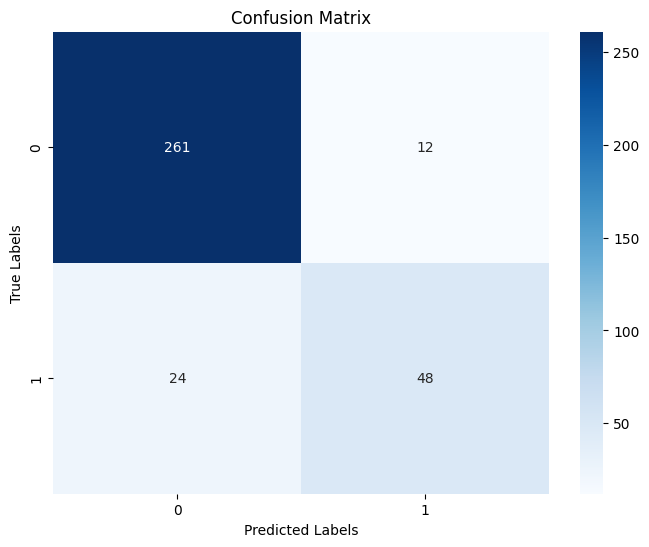

In [110]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

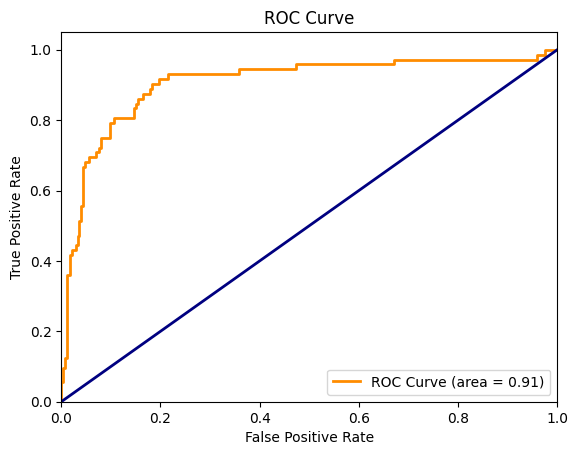

In [111]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [112]:
# Comparing Predicted and original dataframe Values
for orgin_val, pred_val in zip(y_test, model_prediction):
    print(f'Original Value: {orgin_val}, Predicted Value: {pred_val}')

Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Val

In [113]:
# Counting values correctly predicted by the Logistic Regression model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Logistic Regression Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Logistic Regression Model:
Number of Total Predictions: 345
Number of Correct Predictions: 309
Number of Wrong Predictions: 36


## Model: Decision Tree

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building a Decision Tree Model
dt_model = DecisionTreeClassifier()

# # Fitting and Making Predictions for the Decision Tree model
dt_model.fit(X_train, y_train)
dt_prediction = dt_model.predict(X_test)

In [115]:
# Evaluating Model Performance
dt_accuracy = accuracy_score(y_test, dt_prediction)
dt_report = classification_report(y_test, dt_prediction)

print(f'Accuracy: {dt_accuracy}')
print(f'Classification Report: {dt_report}')

y_pred_prob = dt_model.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_prediction))

Accuracy: 0.8318840579710145
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.90      0.89       273
           1       0.60      0.58      0.59        72

    accuracy                           0.83       345
   macro avg       0.75      0.74      0.74       345
weighted avg       0.83      0.83      0.83       345

Confusion Matrix:
[[245  28]
 [ 30  42]]


In [116]:
# Check for Overfitting with Cross-Validation
cv_scores = cross_val_score(dt_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.75217391 0.8173913  0.79475983 0.82969432 0.86462882]
Mean cross-validation score: 0.8117296373647237


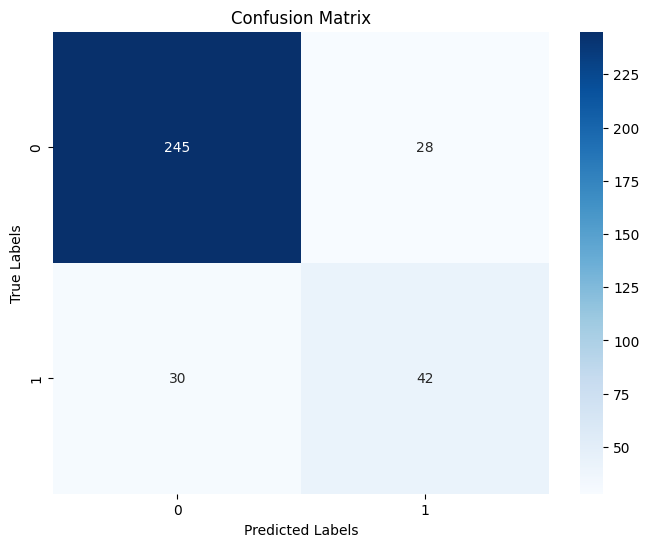

In [117]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, dt_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

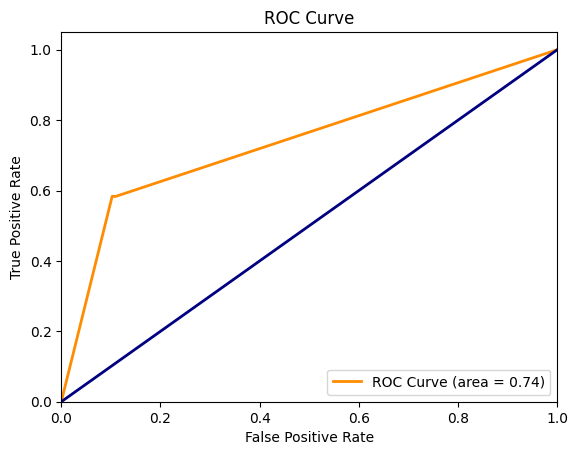

In [118]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [119]:
# Comparing Predicted and original dataframe Values
for orgin_val, pred_val in zip(y_test, dt_prediction):
    print(f'Original Value: {orgin_val}, Predicted Value: {pred_val}')

Original Value: 1, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 1
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Val

In [120]:
# Counting values correctly predicted by the Desision Tree model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, dt_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Decision Tree Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Decision Tree Model:
Number of Total Predictions: 345
Number of Correct Predictions: 287
Number of Wrong Predictions: 58


## Model: AdaBoost

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# AdaBoost Model

adaboost_model = AdaBoostClassifier(n_estimators = 50, random_state = 42)

# Fitting and Making Predictions for the adaboost model
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [122]:
# Evaluating Model Performance
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_report = classification_report(y_test, adaboost_predictions)

print(f'Accuracy: {adaboost_accuracy}')
print(f'Classification Report: {adaboost_report}')

y_pred_prob = adaboost_model.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, adaboost_predictions))

Accuracy: 0.8695652173913043
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.95      0.92       273
           1       0.74      0.58      0.65        72

    accuracy                           0.87       345
   macro avg       0.82      0.76      0.79       345
weighted avg       0.86      0.87      0.86       345

Confusion Matrix:
[[258  15]
 [ 30  42]]


In [123]:
# Check for Overfitting with Cross-Validation
cv_scores = cross_val_score(adaboost_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

Cross-validation scores: [0.86086957 0.86521739 0.83406114 0.87336245 0.86026201]
Mean cross-validation score: 0.8587545092082779


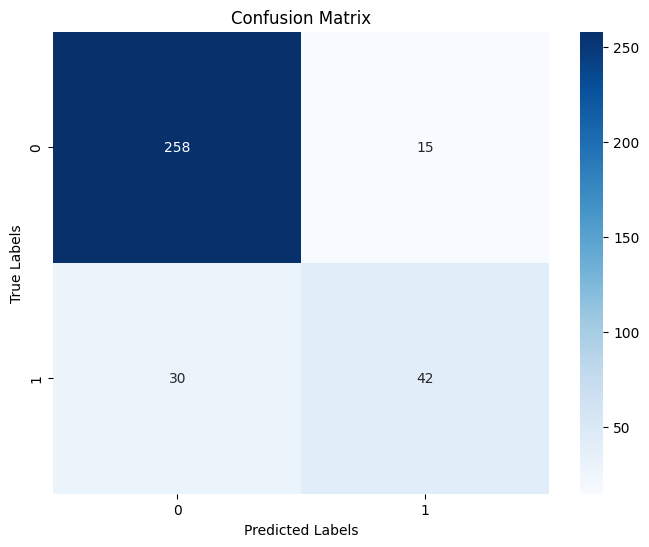

In [124]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, adaboost_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

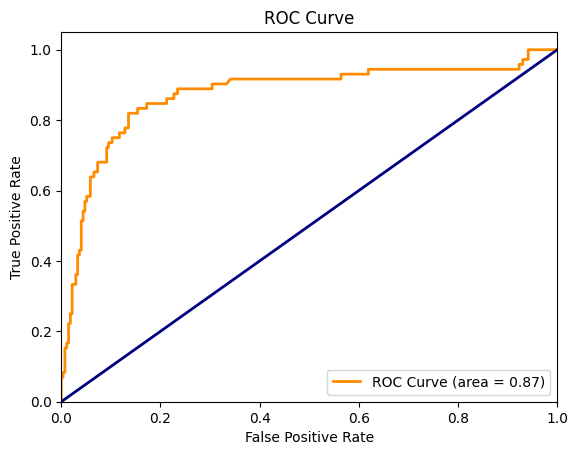

In [125]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [126]:
# Comparing Predicted and original dataframe Values
for orgin_val, pred_val in zip(y_test, adaboost_predictions):
    print(f'Original Value: {orgin_val}, Predicted Value: {pred_val}')

Original Value: 1, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Val

In [127]:
# Counting values correctly predicted by the Adaboost model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, adaboost_predictions):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Adaboost Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Adaboost Model:
Number of Total Predictions: 345
Number of Correct Predictions: 300
Number of Wrong Predictions: 45


## Model: Random Forest

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Model

randm_forst = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting and Making Predictions for the Random Forest model
randm_forst.fit(X_train, y_train)
randm_prediction = randm_forst.predict(X_test)

In [129]:
# Evaluating Model Performance
randm_accuracy = accuracy_score(y_test, randm_prediction)
randm_report = classification_report(y_test, randm_prediction)

print(f'Accuracy: {randm_accuracy}')
print(f'Classification Report: {randm_report}')

y_pred_prob = randm_forst.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, randm_prediction))

Accuracy: 0.8753623188405797
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.81      0.53      0.64        72

    accuracy                           0.88       345
   macro avg       0.85      0.75      0.78       345
weighted avg       0.87      0.88      0.86       345

Confusion Matrix:
[[264   9]
 [ 34  38]]


In [130]:
# Check for Overfitting with Cross-Validation
cv_scores = cross_val_score(randm_forst, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.86956522 0.87826087 0.8558952  0.88209607 0.82969432]
Mean cross-validation score: 0.8631023352952345


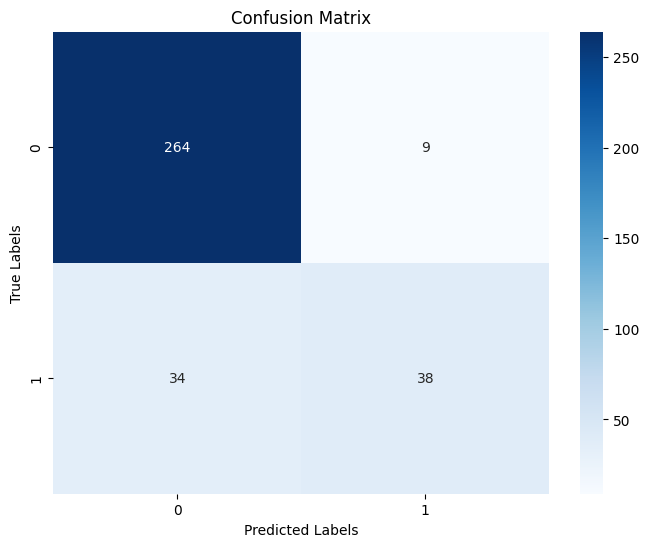

In [131]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, randm_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

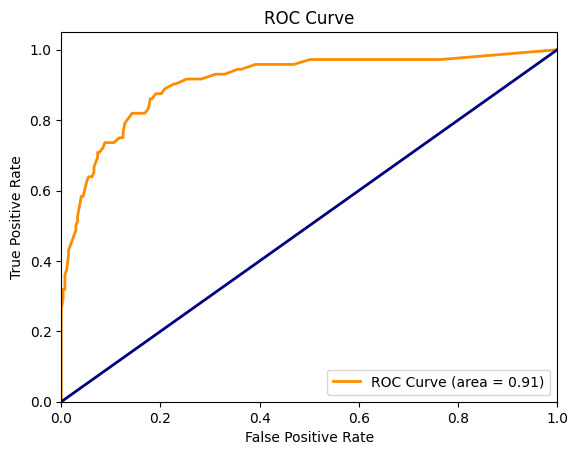

In [132]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [133]:
# Comparing Predicted and original dataframe Values
for orgin_val, pred_val in zip(y_test, randm_prediction):
    print(f'Original Value: {orgin_val}, Predicted Value: {pred_val}')

Original Value: 1, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Val

In [134]:
# Counting values correctly predicted by the Random Forest model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, randm_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Random Forest Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Random Forest Model:
Number of Total Predictions: 345
Number of Correct Predictions: 302
Number of Wrong Predictions: 43


## Model Evaluation
### Best Model: Logistic Regression
#### Logistic Regression consistently performs well across metrics and shows strong stability with cross-validation among the four models


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9572\3497206682.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_counts.index, y=performance_counts.values, palette='viridis')


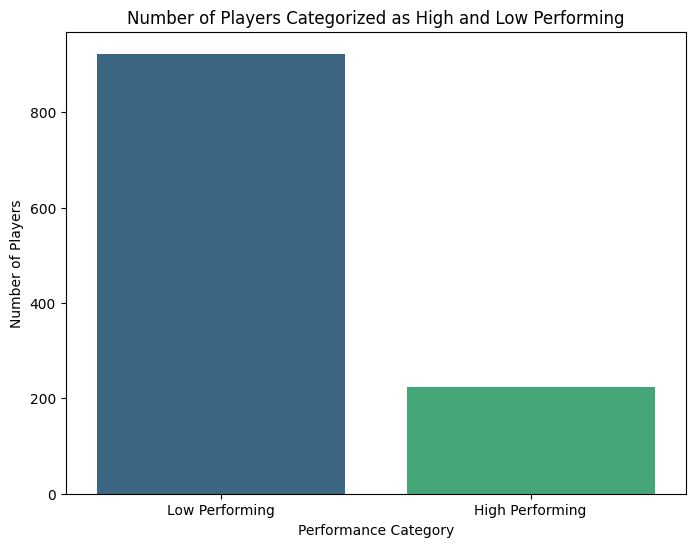

In [135]:
# Bar Chart for Player Performance Categories
performance_counts = y.value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=performance_counts.index, y=performance_counts.values, palette='viridis')
plt.xlabel('Performance Category')
plt.ylabel('Number of Players')
plt.title('Number of Players Categorized as High and Low Performing')
plt.xticks(ticks=[0, 1], labels=['Low Performing', 'High Performing'])
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9572\3174770310.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features['Importance'], y=top_features['Feature'], palette='viridis')


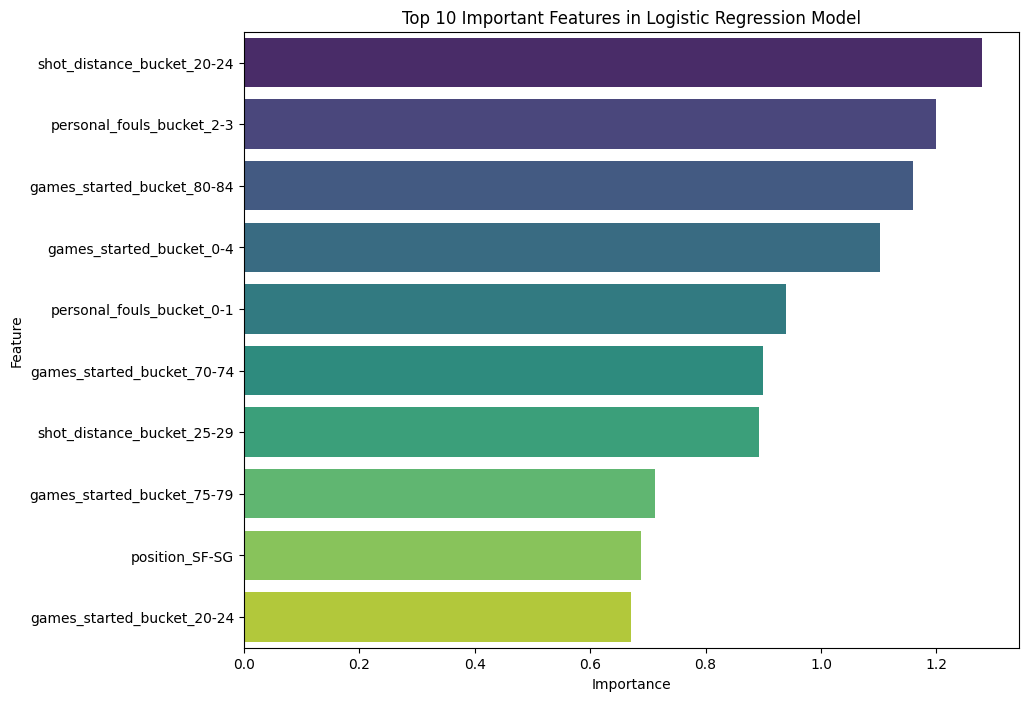

In [136]:

# Feature Importance
feature_importance = np.abs(logreg_model.coef_[0])
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Top 10 important features
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_features['Importance'], y=top_features['Feature'], palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features in Logistic Regression Model')
plt.show()